In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Students' engagement in after lunch classes.csv to Students' engagement in after lunch classes (3).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Students' engagement in after lunch classes.csv")

# Data Treatment

In [ ]:

df = df.rename(columns={"What kind of diet do you generally follow?": "Diet"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Carbohydrates]": "Carbohydrates"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Carbohydrates-Proteins]": "Carbohydrates-Proteins"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Proteins]": "Proteins"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Proteins-Fats]": "Proteins-Fats"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Fats]": "Fats"})
df = df.rename(columns={"What were the approximate proportions of the macro nutrients in your lunch meal? [Others]": "Others"})
df = df.rename(columns={"How full did you feel after lunch?": "Feeling"})
df = df.rename(columns={"Did you have coffee or any other energy drinks between lunch and the end of your class?": "Energy drinks"})
df = df.rename(columns={"How would you describe the type of afternoon class you had right after lunch today?": "Class type"})
df = df.rename(columns={"How interactive would you rate your afternoon class as?": "Class rate"})
df = df.rename(columns={"How many breaks did you have during the after-lunch class?": "Class breaks"})
df = df.rename(columns={"How would you rate your energy level during your afternoon class?": "Class energy"})
df = df.rename(columns={"How much did YOU  interact in the afternoon class (raising hands, asking questions, etc)?": "Class interaction"})
df = df.rename(columns={"How long (in hours) was your afternoon class?  ": "Class long"})
df = df.rename(columns={"Approximately, how many minutes of your class time did you spend on your phone for non educational purposes (checking hours, emails, Twitter, Netflix, etc)?": "Class phone"})
df = df.rename(columns={"How much did you collaborate with your classmates?": "Class collaboration"})
df = df.rename(columns={"How much did you enjoy the class?": "Class enjoy"})
df = df.rename(columns={"At what time did you complete this form? ": "Form completion"})
df = df.rename(columns={"How confident are you in the accuracy of your previous answers?": "Form confidency"})

df.columns

Index(['Timestamp', 'Age', 'Sex', 'Degree', 'Diet', 'Carbohydrates',
       'Carbohydrates-Proteins', 'Proteins', 'Proteins-Fats', 'Fats', 'Others',
       'Feeling', 'Energy drinks', 'Class type', 'Class long', 'Class rate',
       'Class breaks', 'Class energy', 'Class interaction', 'Class phone',
       'Class collaboration', 'Class enjoy', 'Form completion',
       'Form confidency'],
      dtype='object')

In [ ]:
col_list = ['Sex', 'Degree', 'Diet', 'Nutrients Carbohydrates',
       'Nutrients Carbohydrates-Proteins', 'Nutrients Proteins',
       'Nutrients Proteins-Fats', 'Nutrients Fats', 'Nutrients Others',
       'Feeling', 'Energy drinks', 'Class type', 'Class long', 'Class phone',
       'Form completion']

In [ ]:
df['Class phone'] = df['Class phone'].str.extractall(r'([0-9]+)').reset_index().groupby('level_0')[0].max()
df['Class phone'] = pd.to_numeric(df['Class phone'], errors="coerce")

In [ ]:
df.loc[df['Feeling'] == 'I am still hungry', ['Feeling']] = 0
df.loc[df['Feeling'] == 'I feel satisfied with how much I ate', ['Feeling']] = 1
df.loc[df['Feeling'] == 'I am too full, I overate', ['Feeling']] = 2
df["Feeling"] = pd.to_numeric(df["Feeling"], errors = "coerce")

In [ ]:
df_bkp = df.copy()

df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 48
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               44 non-null     object 
 1   Age                     44 non-null     int64  
 2   Sex                     44 non-null     object 
 3   Degree                  44 non-null     object 
 4   Diet                    44 non-null     object 
 5   Carbohydrates           44 non-null     object 
 6   Carbohydrates-Proteins  44 non-null     object 
 7   Proteins                44 non-null     object 
 8   Proteins-Fats           44 non-null     object 
 9   Fats                    44 non-null     object 
 10  Others                  44 non-null     object 
 11  Feeling                 44 non-null     float64
 12  Energy drinks           44 non-null     object 
 13  Class type              44 non-null     object 
 14  Class long              44 non-null     obje

In [ ]:
def percentage_treatment(nutri):
    if nutri in ['0%', '<10%', '25%']:
        return 'low'
    elif nutri in ['50%']:
        return 'medium'
    elif nutri in ['75%', '>75%']:
        return 'high'
    else:
        print(nutri)

In [ ]:
def level_treatment(level):
    if level < 3:
        return 1
    elif level == 3:
        return 2
    elif level > 3:
        return 3
    else:
        print(level)

In [ ]:
# select the most confident responses

#df = df[df["Form confidency"]>=7].reset_index(drop=True)

# Data Analysis

## Lunch  (For Hypothesis 1)

### Carbohydrates

In [ ]:
df['Carbohydrates_categories'] = df['Carbohydrates'].apply(lambda x: percentage_treatment(x))

In [ ]:
df['interaction'] = df['Class interaction'].apply(lambda x: level_treatment(x))
df['energy'] = df['Class energy'].apply(lambda x: level_treatment(x))
df['collaboration'] = df['Class collaboration'].apply(lambda x: level_treatment(x))
df['enjoy'] = df['Class enjoy'].apply(lambda x: level_treatment(x))

In [ ]:
df[['Carbohydrates_categories', 'Timestamp']].groupby(['Carbohydrates_categories']).count()

,Timestamp
Carbohydrates_categories,
high,10
low,14
medium,20


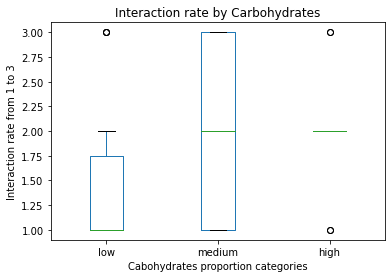

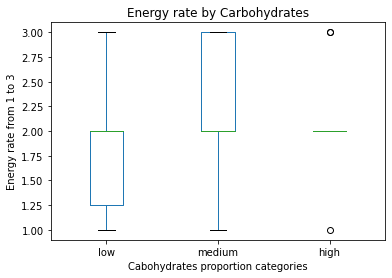

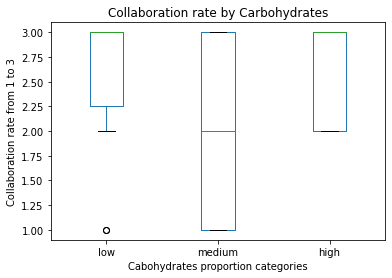

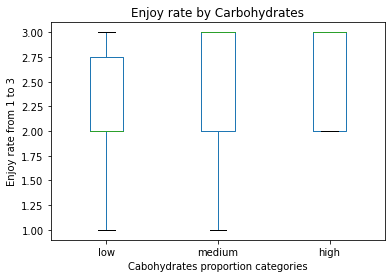

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'Carbohydrates_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box()

    plt.title(f"{col.capitalize()} rate by Carbohydrates")
    plt.xlabel('Cabohydrates proportion categories')
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Proteins

In [ ]:
df['Proteins_categories'] = df['Proteins'].apply(lambda x: percentage_treatment(x))

In [ ]:
df[['Proteins_categories', 'Timestamp']].groupby(['Proteins_categories']).count()

,Timestamp
Proteins_categories,
high,3
low,38
medium,3


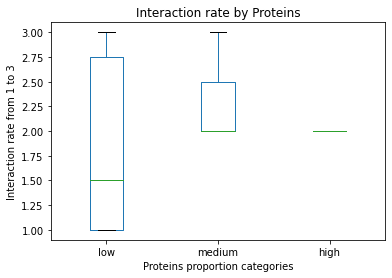

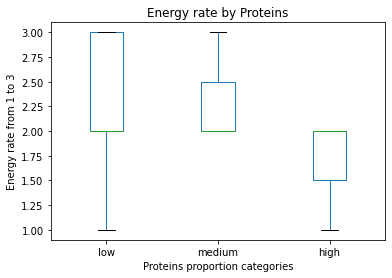

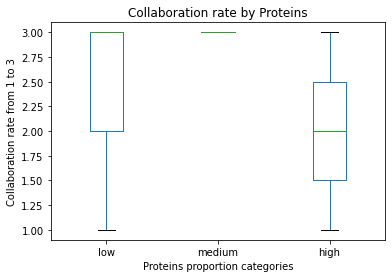

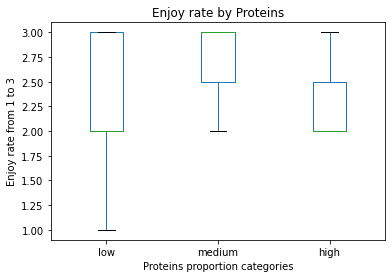

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box()

    plt.title(f"{col.capitalize()} rate by Proteins")
    plt.xlabel('Proteins proportion categories')
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Carbohydrates-Protein

In [ ]:
df['Carbohydrates-Proteins_categories'] = df['Carbohydrates-Proteins'].apply(lambda x: percentage_treatment(x))
df[['Carbohydrates-Proteins_categories', 'Timestamp']].groupby(['Carbohydrates-Proteins_categories']).count()

,Timestamp
Carbohydrates-Proteins_categories,
high,1
low,36
medium,7


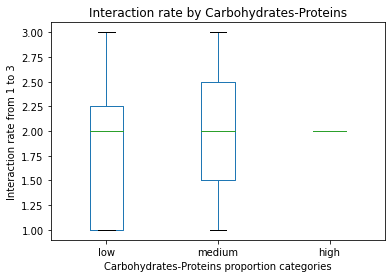

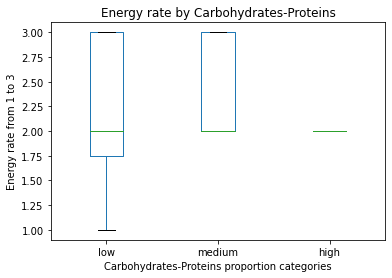

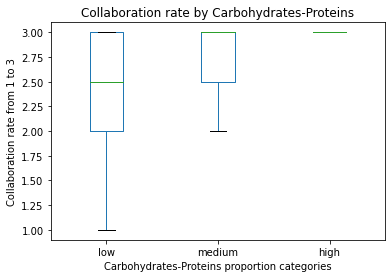

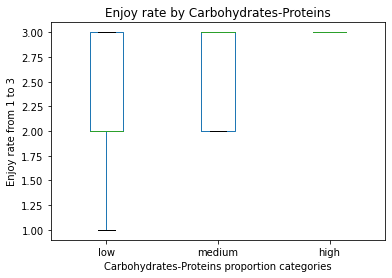

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'Carbohydrates-Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box()

    plt.title(f"{col.capitalize()} rate by Carbohydrates-Proteins")
    plt.xlabel('Carbohydrates-Proteins proportion categories')
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Fats

In [ ]:
df['Fats_categories'] = df['Fats'].apply(lambda x: percentage_treatment(x))
df[['Fats_categories', 'Timestamp']].groupby(['Fats_categories']).count()

,Timestamp
Fats_categories,
high,1
low,42
medium,1


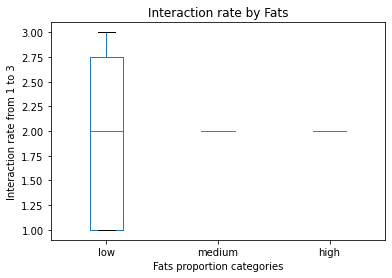

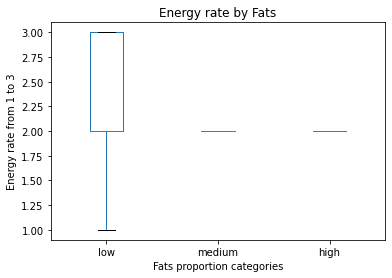

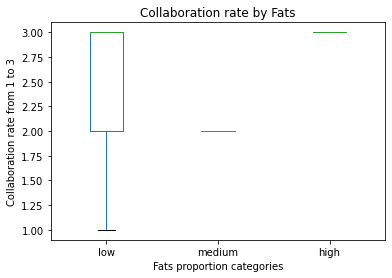

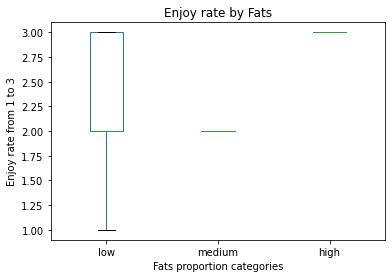

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'Fats_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box()

    plt.title(f"{col.capitalize()} rate by Fats")
    plt.xlabel('Fats proportion categories')
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Energy drinks

In [ ]:
df['Energy drinks'].unique()

array(['I usually do not, and I did not drink today either',
       'I usually do, and I drank today too',
       'I usually do not, but I drank today',
       'I usually do, but I did not drink today'], dtype=object)

In [ ]:
df[['Energy drinks', 'Timestamp']].groupby(['Energy drinks']).count()

,Timestamp
Energy drinks,
"I usually do not, and I did not drink today either",18
"I usually do not, but I drank today",2
"I usually do, and I drank today too",15
"I usually do, but I did not drink today",9


In [ ]:
def drinks_treatment(status_drink):
    if status_drink == 'I usually do, and I drank today too':
        return 'do, drank today'
    elif status_drink == 'I usually do not, and I did not drink today either':
        return 'do not, not drank today'
    elif status_drink == 'I usually do not, but I drank today':
        return 'do not, drank today'
    elif status_drink == 'I usually do, but I did not drink today':
        return 'do, not drank today'
    else:
        print(level)

In [ ]:
df['energy_drinks'] = df['Energy drinks'].apply(lambda x: drinks_treatment(x))

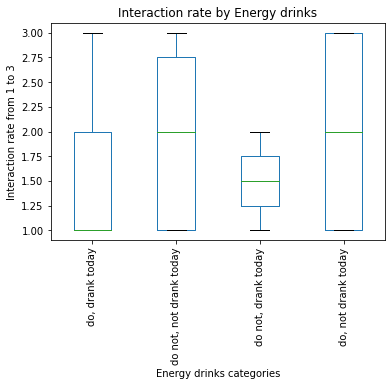

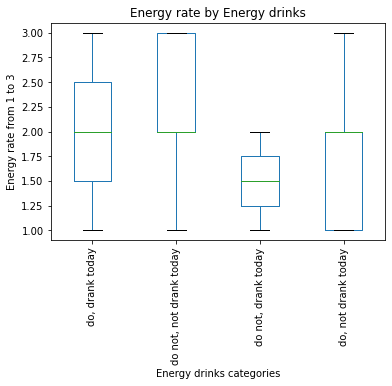

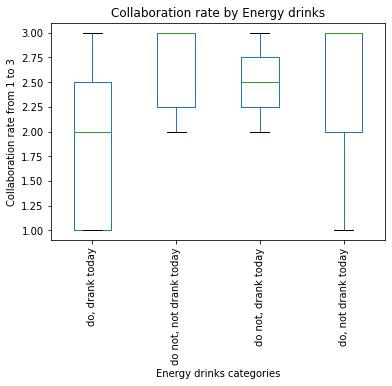

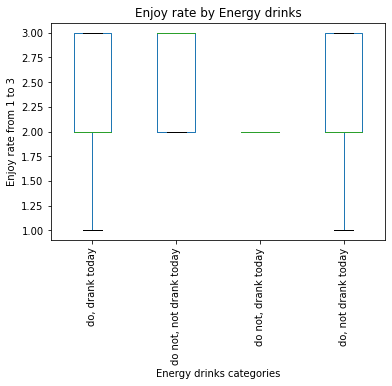

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'energy_drinks', values = col, index = 'Timestamp')[['do, drank today',
                                                                                  'do not, not drank today',
                                                                                  'do not, drank today',
                                                                                  'do, not drank today']].plot.box()

    plt.title(f"{col.capitalize()} rate by Energy drinks")
    plt.xlabel('Energy drinks categories')
    plt.xticks(rotation=90)
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Fullness

In [ ]:
df[['Feeling', 'Timestamp']].groupby(['Feeling']).count()


,Timestamp
Feeling,
0.0,7
1.0,33
2.0,4


In [ ]:
#df.loc[df['Feeling'] == , ['Feeling']] = 0
#df.loc[df['Feeling'] == 'Satisfied', ['Feeling']] = 1
#df.loc[df['Feeling'] == 'Too full', ['Feeling']] = 2


In [ ]:
def feeling_treatment(feeling):
    if feeling == 0.0:
        return 'Hungry'
    elif feeling == 1.0:
        return 'Satisfied'
    elif feeling == 2.0:
        return 'Too full'
    else:
        print(level)

In [ ]:
df['fullness'] = df['Feeling'].apply(lambda x: feeling_treatment(x))

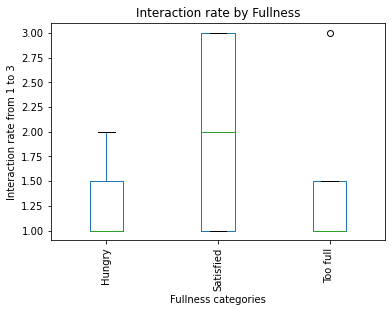

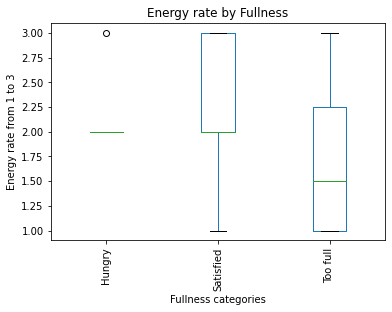

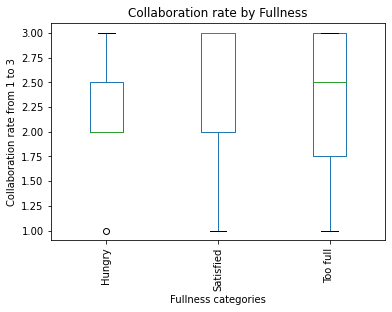

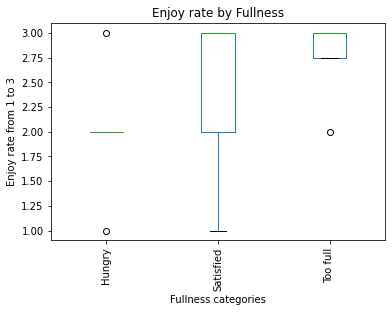

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'fullness', values = col, index = 'Timestamp')[['Hungry', 'Satisfied', 'Too full']].plot.box()

    plt.title(f"{col.capitalize()} rate by Fullness")
    plt.xlabel('Fullness categories')
    plt.xticks(rotation=90)
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

## Classes  (For Hypothesis 2)

### Type of classes

In [ ]:
df_class_type = df[['Timestamp', 'Class type', 'fullness', 'interaction', 'energy', 'collaboration', 'enjoy']]

In [ ]:
df_class_type['Class type'] = df_class_type['Class type'].str.split(';')
df_class_type = df_class_type.apply(lambda x: x.explode() if x.name in ['Class type'] else x)
df_class_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      74 non-null     object
 1   Class type     74 non-null     object
 2   fullness       74 non-null     object
 3   interaction    74 non-null     int64 
 4   energy         74 non-null     int64 
 5   collaboration  74 non-null     int64 
 6   enjoy          74 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.6+ KB


In [ ]:
df_class_type['Class type'].unique()

array(['Programming lessons',
       "Student Presentations (I'm the one listening)", 'Other',
       'Individual self study', 'Lectures',
       "Student Presentations (I'm the one presenting)",
       'Group or project work'], dtype=object)

In [ ]:
def class_type_treatment(class_type):
    if class_type in ['Programming lessons', "Student Presentations (I'm the one presenting)", 'Group or project work']:
        return 'active'
    elif class_type in ["Student Presentations (I'm the one listening)",'Individual self study', 'Lectures']:
        return 'passive'
    else:
        print(class_type)

In [ ]:
df_class_type['class_type'] = df_class_type['Class type'].apply(lambda x: class_type_treatment(x))

Other
Other


In [ ]:
df_class_type[['class_type', 'Timestamp']].groupby(['class_type']).count()

,Timestamp
class_type,
active,26
passive,46


In [ ]:
## uniformizing df

In [ ]:
df_class_type1 = df_class_type.groupby(['Timestamp'])['class_type'].apply(lambda x: ','.join(x.astype(str))).reset_index()

In [ ]:
for index, row in df_class_type1.iterrows():
  rowx = row["class_type"].split(",")
  val = sorted(rowx, key=rowx.count, reverse=True)[0]
  if rowx.count("active") == rowx.count("passive"):
    val = "active"
  df_class_type1.at[index,'class_type'] = val

In [ ]:
df_class_type1 = df_class_type1[(df_class_type1["class_type"] == "active") | (df_class_type1["class_type"] == "passive")]

In [ ]:
dfx = pd.merge(df, df_class_type1, on='Timestamp')
df = dfx

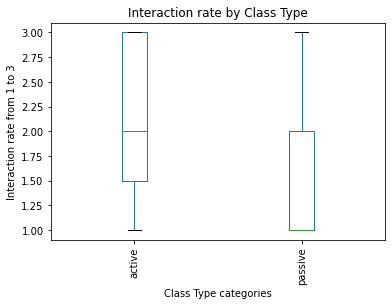

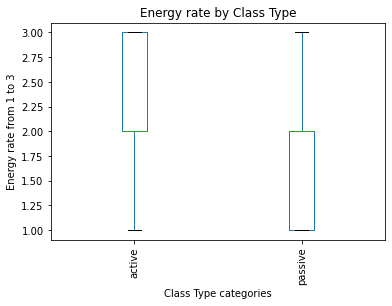

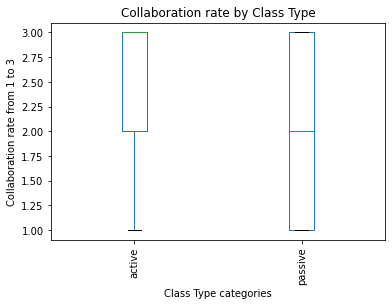

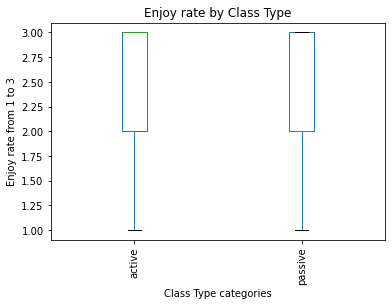

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'class_type', values = col, index = 'Timestamp').plot.box()

    plt.title(f"{col.capitalize()} rate by Class Type")
    plt.xlabel('Class Type categories')
    plt.xticks(rotation=90)
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

In [ ]:
#for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
#    df_class_type[].groupby('class_type', col).count().plot.bar()
#
#    plt.title(f"{col.capitalize()} rate by Class Type")
#    plt.xlabel('Class Type categories')
#    plt.xticks(rotation=90)
#    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
#    plt.show()

### Length of the classes

In [ ]:
def length_class_treatment(length_class):
    try:
        if length_class == 'More':
            return 'Equal or more than 3h'
            
        length_class = float(length_class.replace('h', '.'))
        if length_class < 3:
            return 'Less than 3h'
        elif length_class >= 3:
            return 'Equal or more than 3h'
        else:
            print(level)
    except Exception as e:
        print(e)

In [ ]:
df_class_length = df[['Timestamp', 'Class long', 'interaction', 'energy', 'collaboration', 'enjoy']]
df_class_length['Class long'] = df_class_length['Class long'].str.split(';')
df_class_length = df_class_length.apply(lambda x: x.explode() if x.name in ['Class long'] else x)

df_class_length['length_class'] = df_class_length['Class long'].apply(lambda x: length_class_treatment(x))

In [ ]:
df_class_length[['length_class', 'Timestamp']].groupby(['length_class']).count()

,Timestamp
length_class,
Equal or more than 3h,29
Less than 3h,18


In [ ]:
## uniformizing df

In [ ]:
df_class_length1 = df_class_length.groupby(['Timestamp'])['length_class'].apply(lambda x: ','.join(x.astype(str))).reset_index()

In [ ]:
for index, row in df_class_length1.iterrows():
  rowx = row["length_class"].split(",")
  val = max(set(rowx), key = rowx.count)
  if rowx.count("Less than 3h") == rowx.count("Equal or more than 3h"):
    val = "Equal or more than 3h"
  df_class_length1.at[index,'length_class'] = val

In [ ]:
dfx = pd.merge(df, df_class_length1, on='Timestamp')
df = dfx

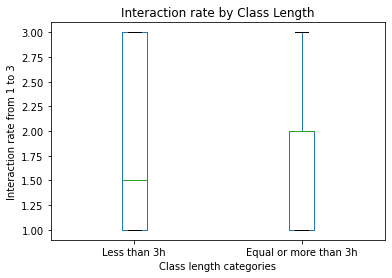

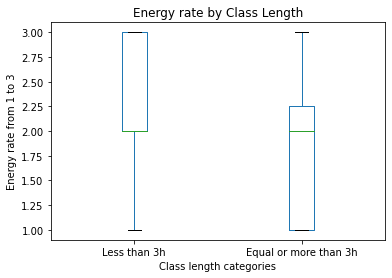

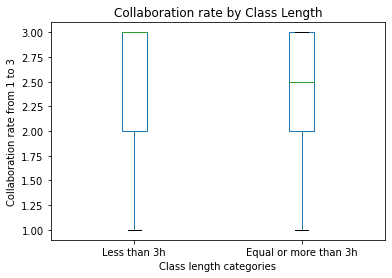

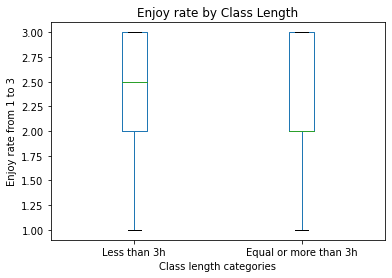

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'length_class', values = col, index = 'Timestamp')[['Less than 3h', 
                                                                                              'Equal or more than 3h']]\
                   .plot.box()
    plt.title(f"{col.capitalize()} rate by Class Length")
    plt.xlabel('Class length categories')
    # plt.xticks(rotation=90)
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

### Interactiveness of the classes

In [ ]:
def level_treatment_cat(level):
    if level < 3:
        return 'low'
    elif level == 3:
        return 'medium'
    elif level > 3:
        return 'high'
    else:
        print(level)

In [ ]:
df['Class rate'].unique()

array([3, 4, 2, 1, 5])

In [ ]:
df['interaction_rate'] = df['Class rate'].apply(lambda x: level_treatment_cat(x))

In [ ]:
df[['interaction_rate', 'Timestamp']].groupby(['interaction_rate']).count()

,Timestamp
interaction_rate,
high,16
low,16
medium,12


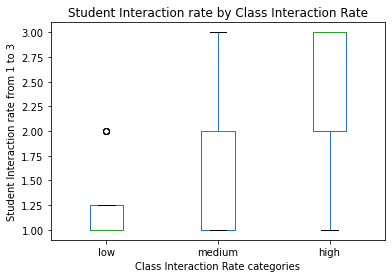

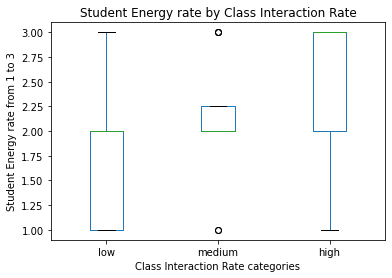

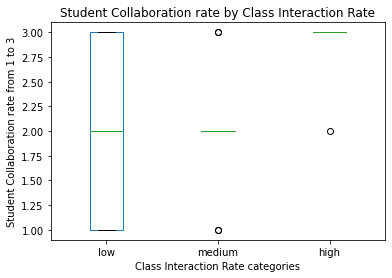

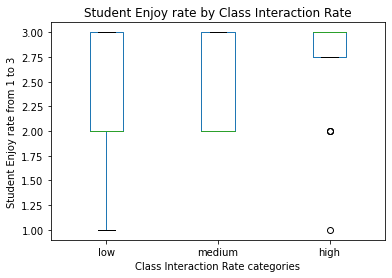

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'interaction_rate', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box()

    plt.title(f"Student {col.capitalize()} rate by Class Interaction Rate")
    plt.xlabel('Class Interaction Rate categories')
    plt.ylabel(f"Student {col.capitalize()} rate from 1 to 3")
    plt.show()

### Breaks

In [ ]:
df['Class breaks'].unique()

array(['1', '0', '2', '> 3'], dtype=object)

In [ ]:
df[['Class breaks', 'Timestamp']].groupby(['Class breaks']).count()

,Timestamp
Class breaks,
0,11
1,22
2,9
> 3,2


In [ ]:
df['class_breaks'] = df['Class breaks']

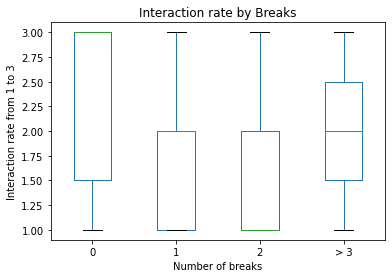

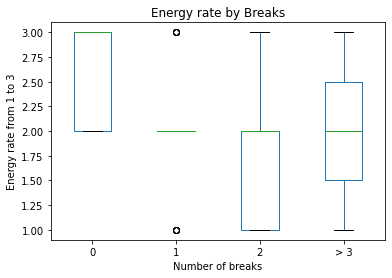

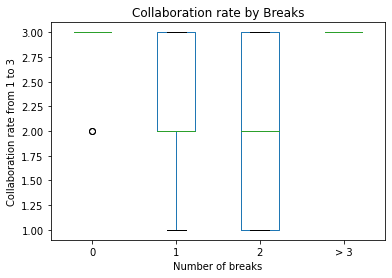

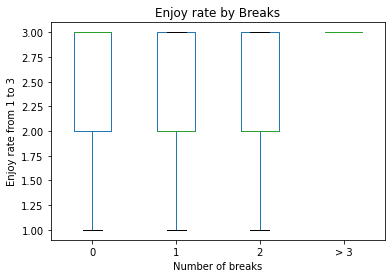

In [ ]:
for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
    df.pivot_table(columns = 'class_breaks', values = col, index = 'Timestamp').plot.box()

    plt.title(f"{col.capitalize()} rate by Breaks")
    plt.xlabel('Number of breaks')
    plt.ylabel(f"{col.capitalize()} rate from 1 to 3")
    plt.show()

## Lunch - Classes (For Hypothesis 3)

In [ ]:
df

,Timestamp,Age,Sex,Degree,Diet,Carbohydrates,Carbohydrates-Proteins,Proteins,Proteins-Fats,Fats,Others,Feeling,Energy drinks,Class type,Class long,Class rate,Class breaks,Class energy,Class interaction,Class phone,Class collaboration,Class enjoy,Form completion,Form confidency,Carbohydrates_categories,interaction,energy,collaboration,enjoy,Proteins_categories,Carbohydrates-Proteins_categories,Fats_categories,energy_drinks,fullness,class_type,length_class,interaction_rate,class_breaks
0,2021/11/23 7:30:55 PM GMT+1,22,Female,M1 Digital science,Vegetarian;Non restricted,>75%,50%,<10%,0%,0%,0%,0.0,"I usually do not, and I did not drink today ei...",Programming lessons,3h,3,1,3,1,15.0,3,3,At the end of the day,9,high,1,2,2,2,low,medium,low,"do not, not drank today",Hungry,active,Equal or more than 3h,medium,1
1,2021/11/23 7:48:25 PM GMT+1,18,Female,L1 FDV,Non restricted,50%,0%,25%,0%,25%,0%,2.0,"I usually do not, and I did not drink today ei...",Student Presentations (I'm the one listening);...,2h,4,0,5,5,7.0,4,4,At the end of the day,10,medium,3,3,3,3,low,low,low,"do not, not drank today",Too full,passive,Less than 3h,high,0
2,2021/11/23 8:06:20 PM GMT+1,28,Male,M1 Digital science,Non restricted,<10%,<10%,<10%,<10%,<10%,<10%,0.0,"I usually do, and I drank today too",Individual self study,1h,2,0,3,2,5.0,3,2,At the end of the day,7,low,1,2,2,1,low,low,low,"do, drank today",Hungry,passive,Less than 3h,low,0
3,2021/11/23 8:30:41 PM GMT+1,26,Male,M1 Digital science,Non restricted,50%,0%,25%,0%,25%,0%,0.0,"I usually do not, and I did not drink today ei...",Lectures,3h,3,1,3,2,0.0,3,3,A different day than the one you're referring to,8,medium,1,2,2,2,low,low,low,"do not, not drank today",Hungry,passive,Equal or more than 3h,medium,1
4,2021/11/23 8:36:05 PM GMT+1,26,Male,M2 Life science,"No pork, no seafood",25%,25%,25%,25%,0%,0%,1.0,"I usually do not, and I did not drink today ei...",Lectures;Individual self study,2h30,2,0,3,1,0.0,4,3,At the end of the day,9,low,1,2,3,2,low,low,low,"do not, not drank today",Satisfied,passive,Less than 3h,low,0
5,2021/11/23 8:37:10 PM GMT+1,27,Female,M1 Learning science,Non restricted,50%,25%,25%,25%,25%,25%,2.0,"I usually do, and I drank today too",Student Presentations (I'm the one presenting)...,3h,2,2,3,2,0.0,3,4,At the end of the day,7,medium,1,2,2,3,low,low,low,"do, drank today",Too full,active,Equal or more than 3h,low,2
6,2021/11/23 9:24:07 PM GMT+1,24,Female,M2 Digital science,Non restricted,<10%,25%,<10%,<10%,25%,<10%,1.0,"I usually do, and I drank today too",Programming lessons,More,2,1,2,2,0.0,2,3,At the end of the day,6,low,1,1,1,2,low,low,low,"do, drank today",Satisfied,active,Equal or more than 3h,low,1
7,2021/11/24 3:22:32 AM GMT+1,19,Male,L1 FDV,Glucid restricted,50%,0%,25%,25%,0%,0%,1.0,"I usually do not, and I did not drink today ei...",Lectures;Individual self study,2h,3,0,4,4,10.0,3,4,At the end of the day,8,medium,3,3,2,3,low,low,low,"do not, not drank today",Satisfied,passive,Less than 3h,medium,0
8,2021/11/24 2:39:56 PM GMT+1,29,Female,M1 Digital science,Non restricted,50%,25%,75%,<10%,50%,<10%,1.0,"I usually do not, but I drank today",Individual self study,3h,3,2,3,3,5.0,3,3,A different day than the one you're referring to,7,medium,2,2,2,2,high,low,medium,"do not, drank today",Satisfied,passive,Equal or more than 3h,medium,2
9,2021/11/24 6:05:04 PM GMT+1,22,Male,M1 Digital science;M1 Life science,Non restricted,50%,<10%,75%,<10%,<10%,0%,1.0,"I usually do, but I did not drink today",Lectures;Group or project work;Student Present...,3h,2,1,2,3,10.0,2,3,At the end of the day,5,medium,2,1,1,2,high,low,low,"do, not drank today",Satisfied,passive,Equal or more than 3h,low,1


### Type of classes - Carbohydrates

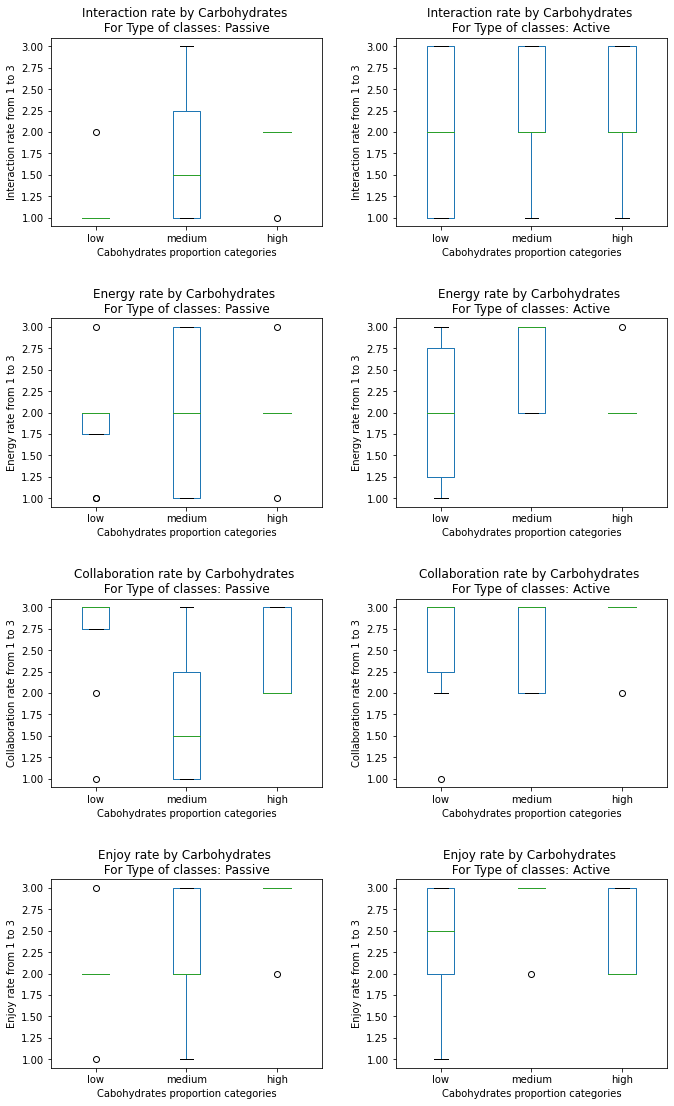

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['passive', 'active']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'Carbohydrates_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Cabohydrates proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Type of classes - Proteins

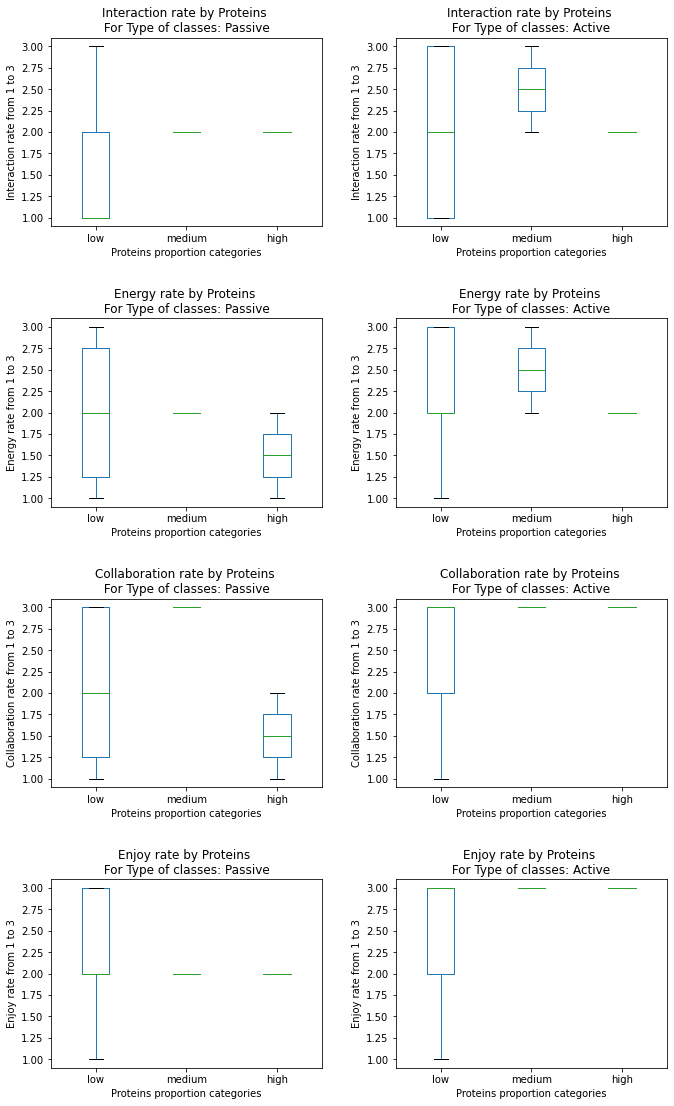

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['passive', 'active']:
  
    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Proteins \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Type of classes - Carbohydrates-Protein

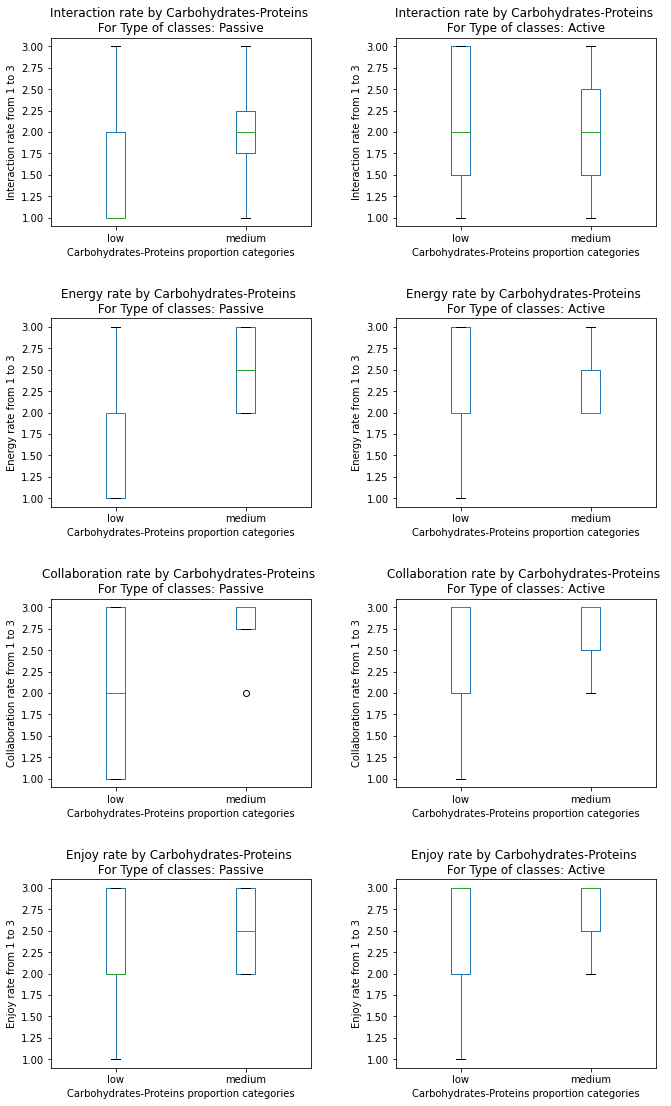

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['passive', 'active']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'Carbohydrates-Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates-Proteins \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Carbohydrates-Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Type of classes - Fats

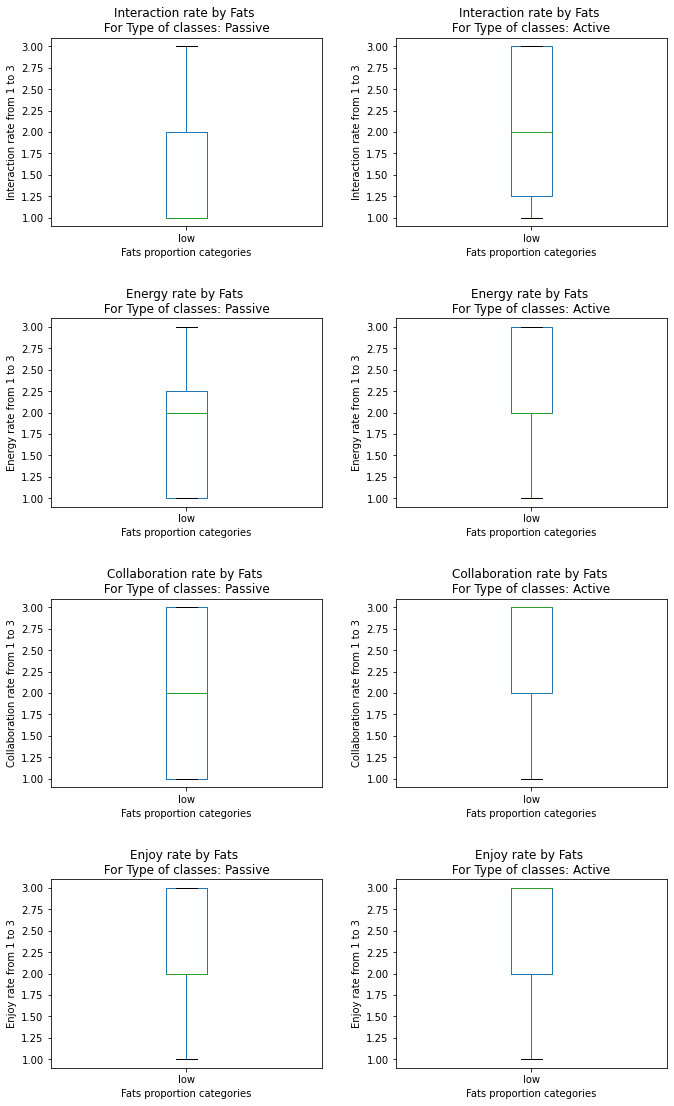

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['passive', 'active']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'Fats_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Fats \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fats proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Type of classes - Energy drinks

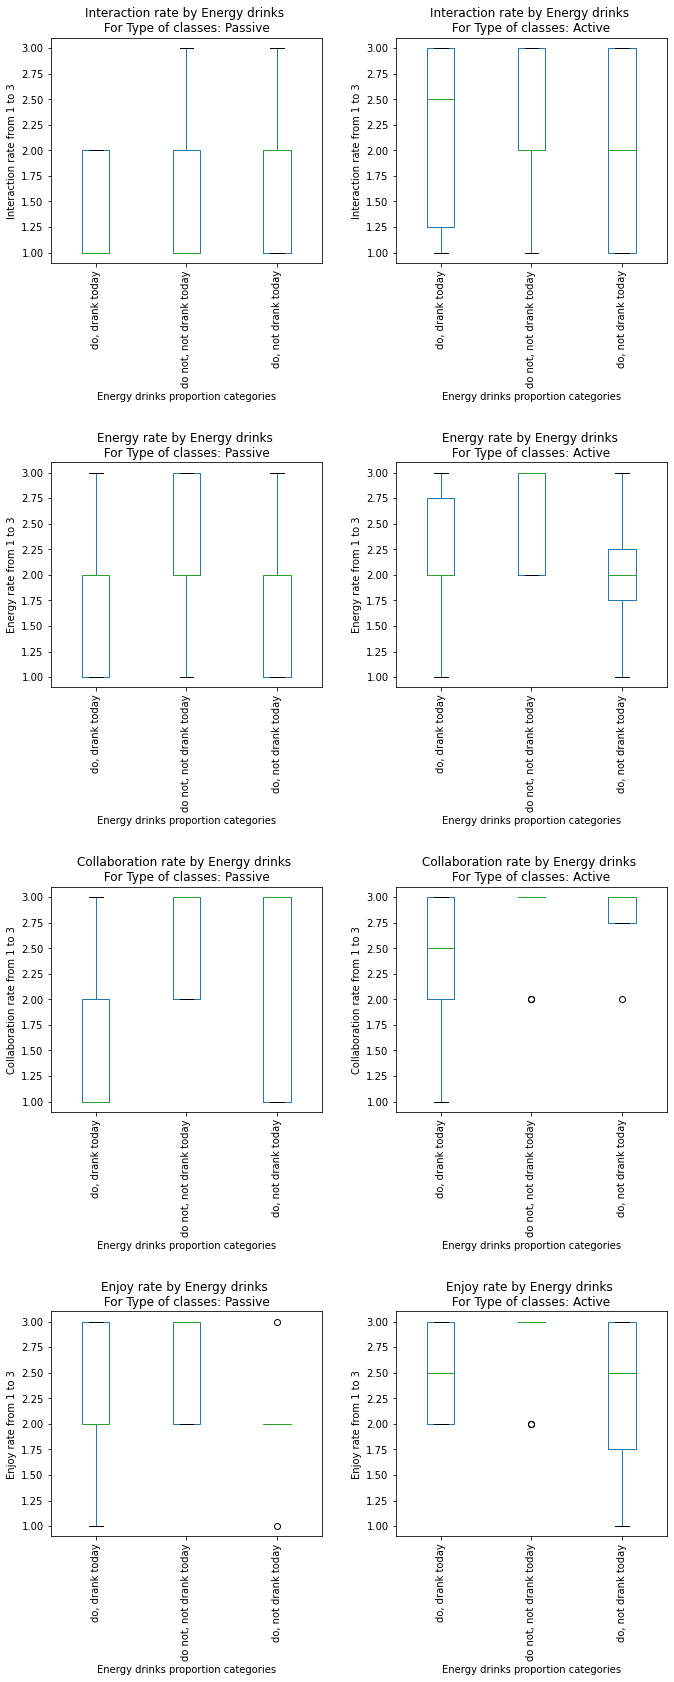

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,24))

j = 0
for col2 in ['passive', 'active']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'energy_drinks', values = col, index = 'Timestamp')[['do, drank today',
                                                                                                                'do not, not drank today',
                                                                                                                'do, not drank today']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Energy drinks \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Energy drinks proportion categories")
        axes[i,j].xaxis.set_tick_params(rotation=90)
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Type of classes - Fullness

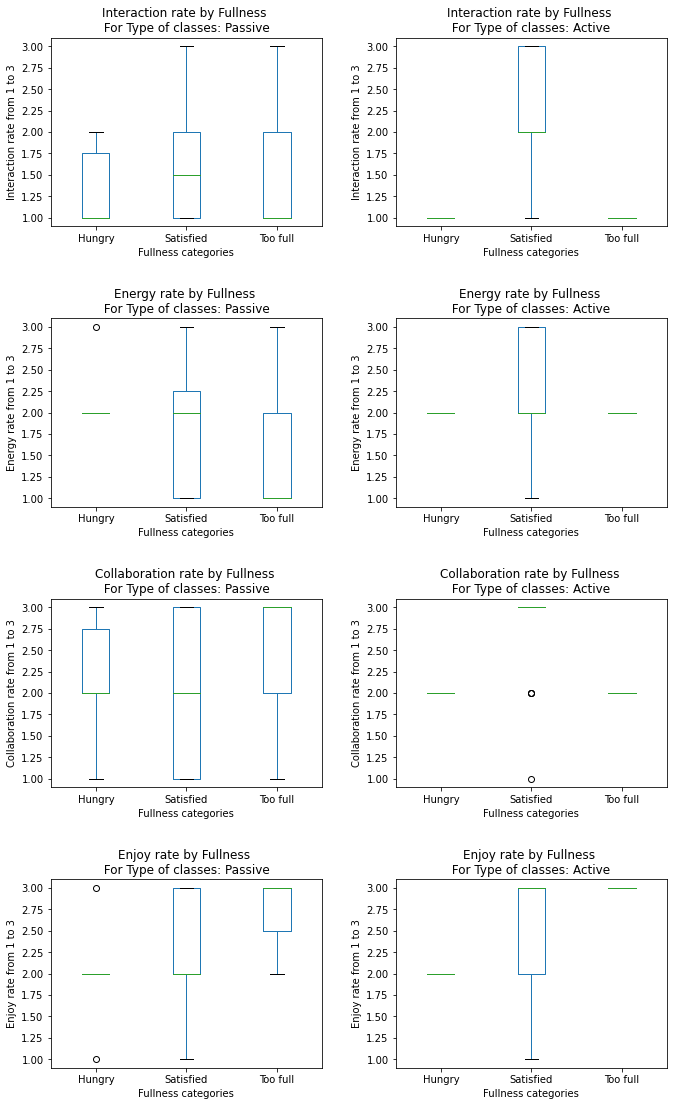

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['passive', 'active']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_type']==col2].pivot_table(columns = 'fullness', values = col, index = 'Timestamp')[['Hungry', 'Satisfied', 'Too full']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Fullness \n For Type of classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fullness categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Carbohydrates

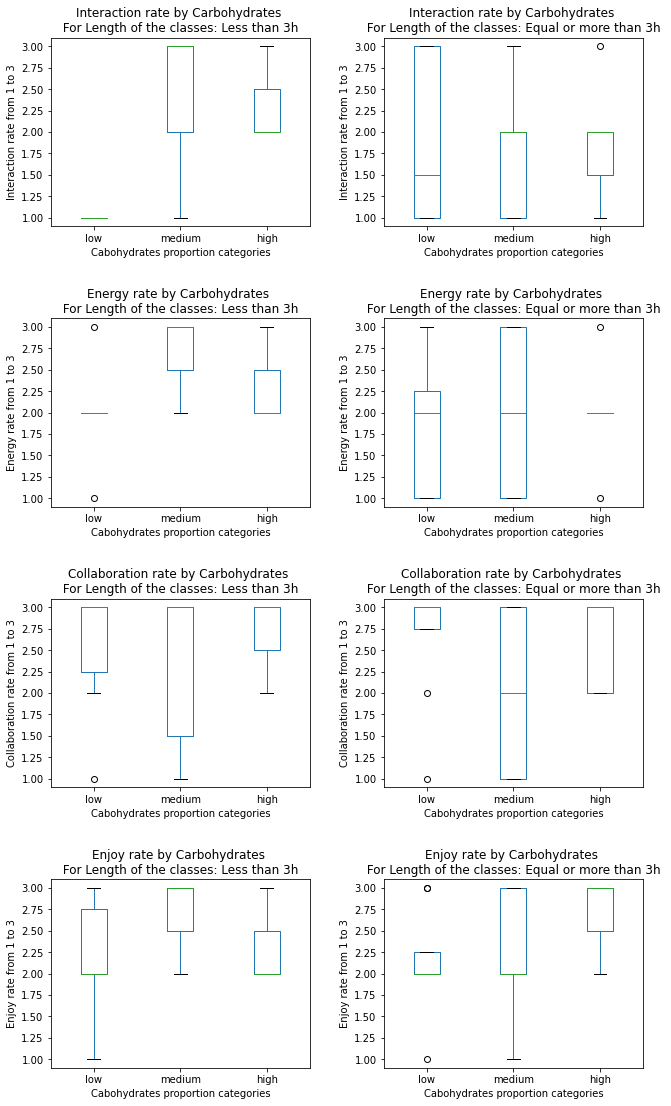

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'Carbohydrates_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Cabohydrates proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Proteins

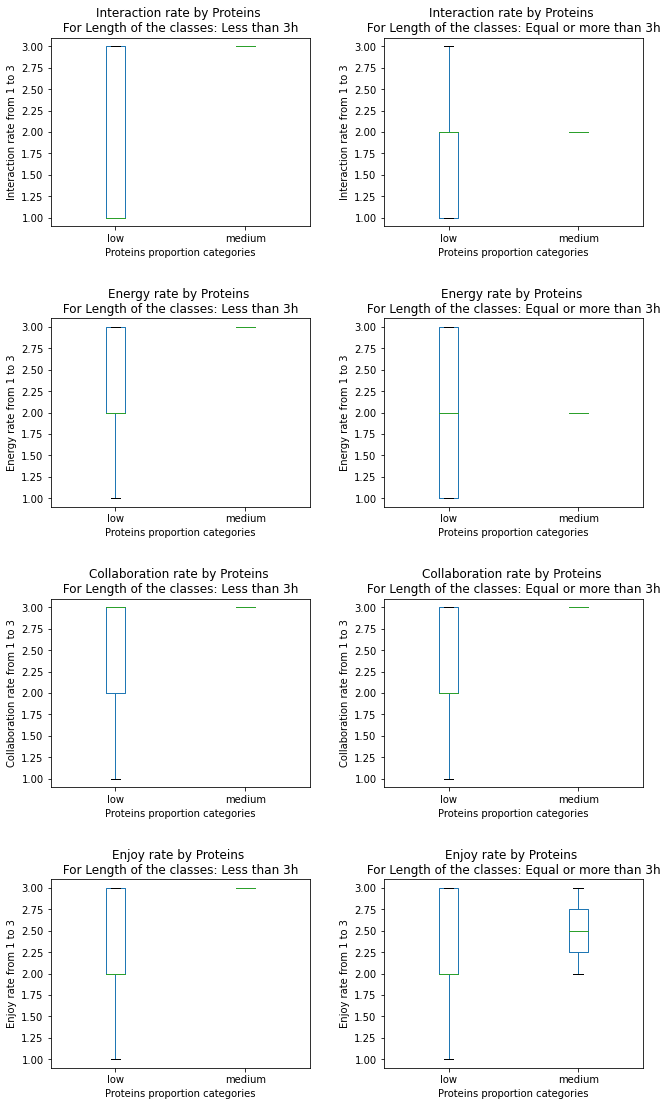

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Proteins \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Carbohydrates-Protein

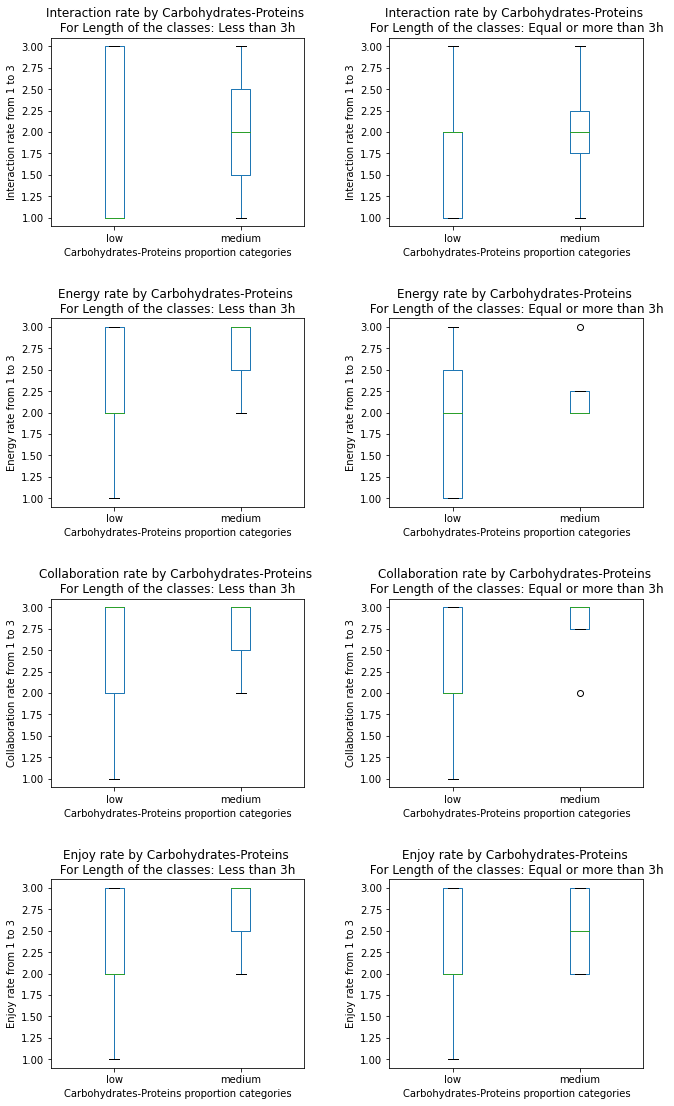

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'Carbohydrates-Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates-Proteins \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Carbohydrates-Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Fats

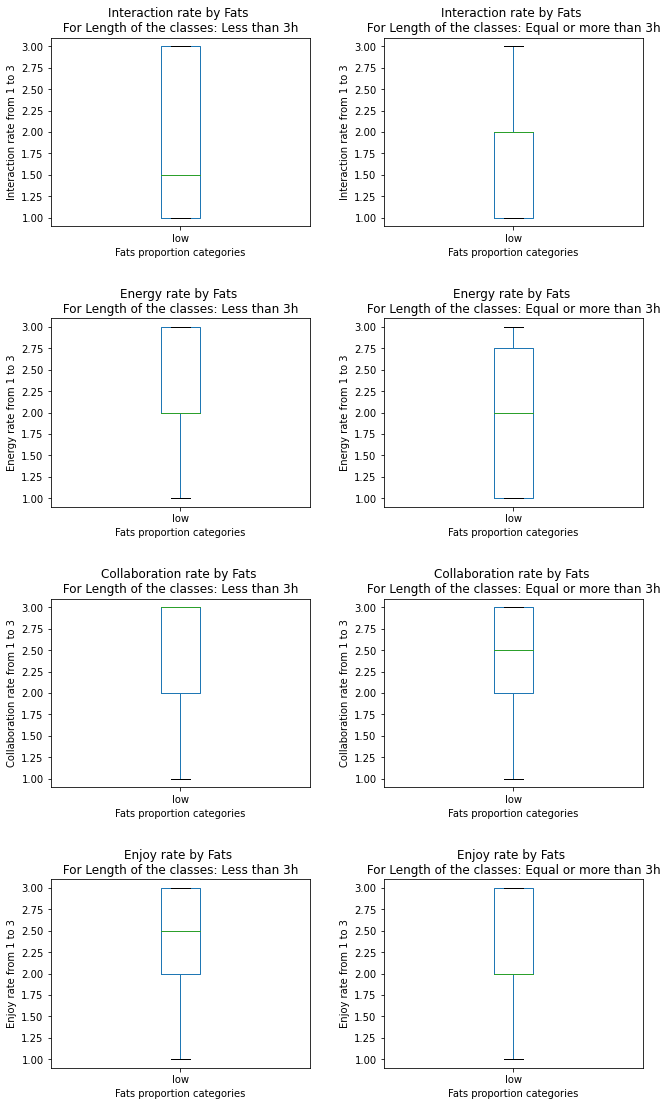

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'Fats_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Fats \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fats proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Energy drinks

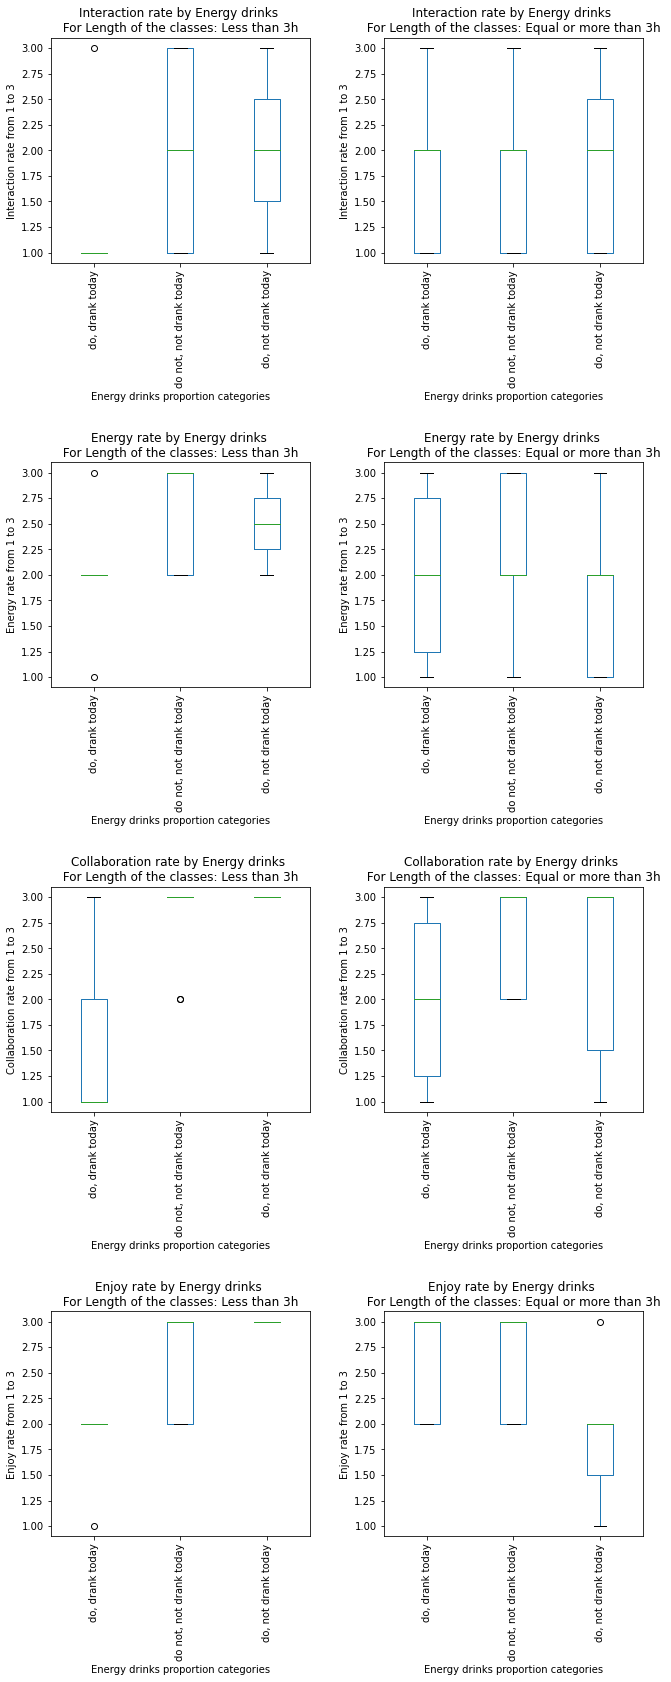

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,24))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'energy_drinks', values = col, index = 'Timestamp')[['do, drank today',
                                                                                                                'do not, not drank today',
                                                                                                                'do, not drank today']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Energy drinks \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Energy drinks proportion categories")
        axes[i,j].xaxis.set_tick_params(rotation=90)
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Length of the classes - Fullness

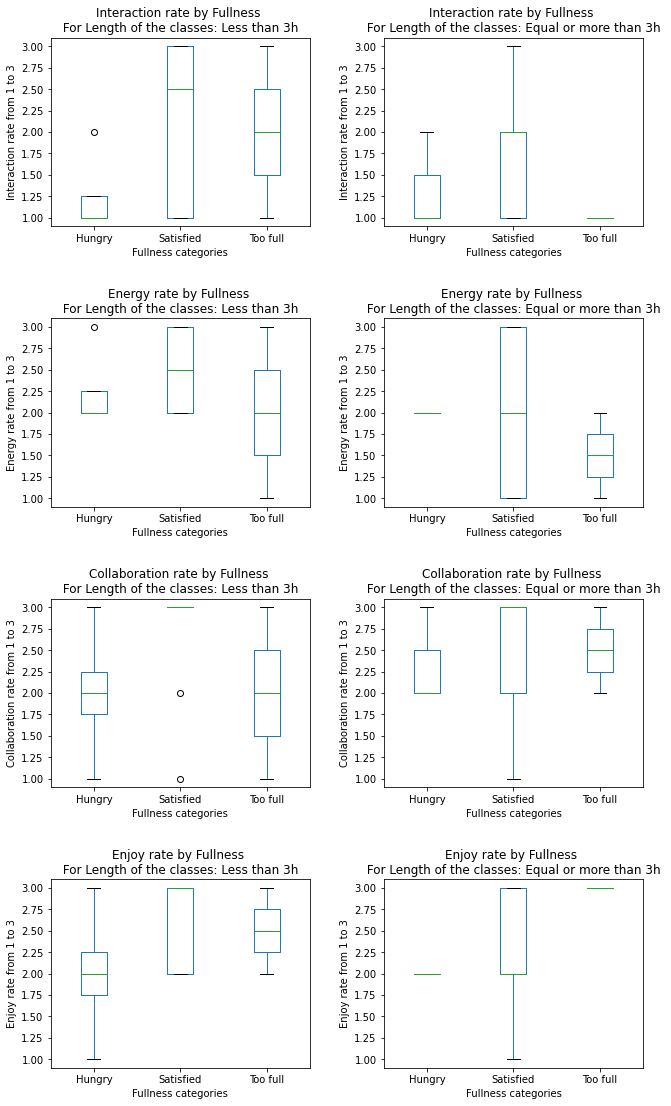

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(10,16))

j = 0
for col2 in ['Less than 3h', 'Equal or more than 3h']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['length_class']==col2].pivot_table(columns = 'fullness', values = col, index = 'Timestamp')[['Hungry', 'Satisfied', 'Too full']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Fullness \n For Length of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fullness categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Carbohydrates

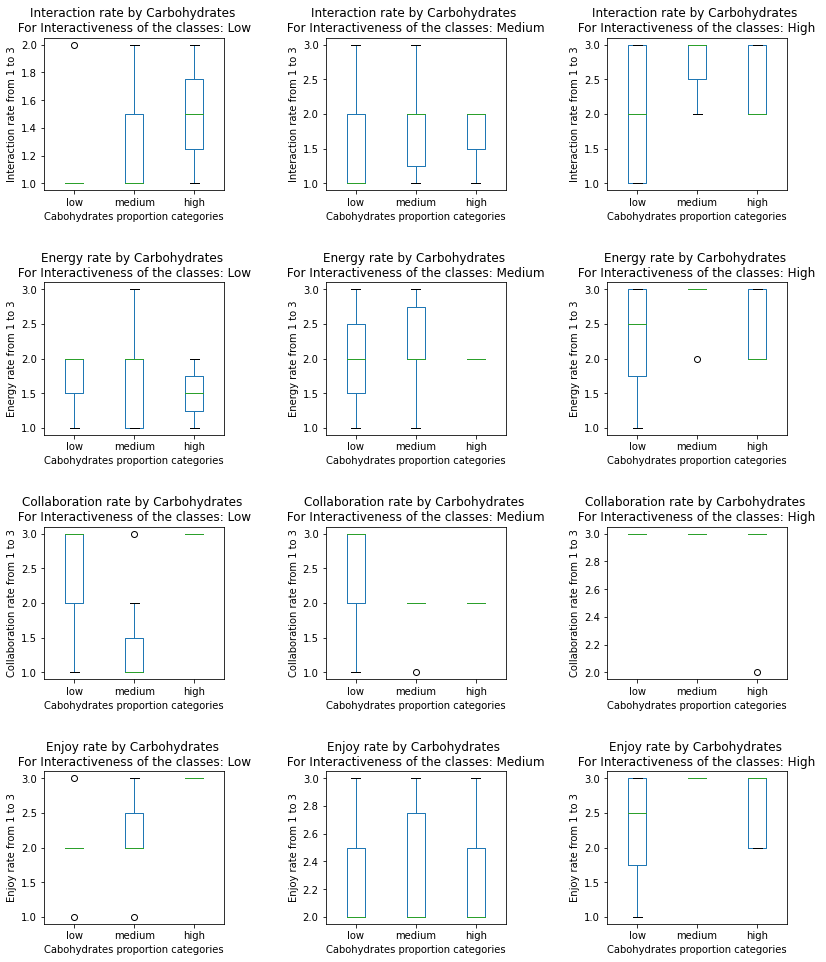

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,14))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'Carbohydrates_categories', values = col, index = 'Timestamp')[['low', 'medium', 'high']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Cabohydrates proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Proteins

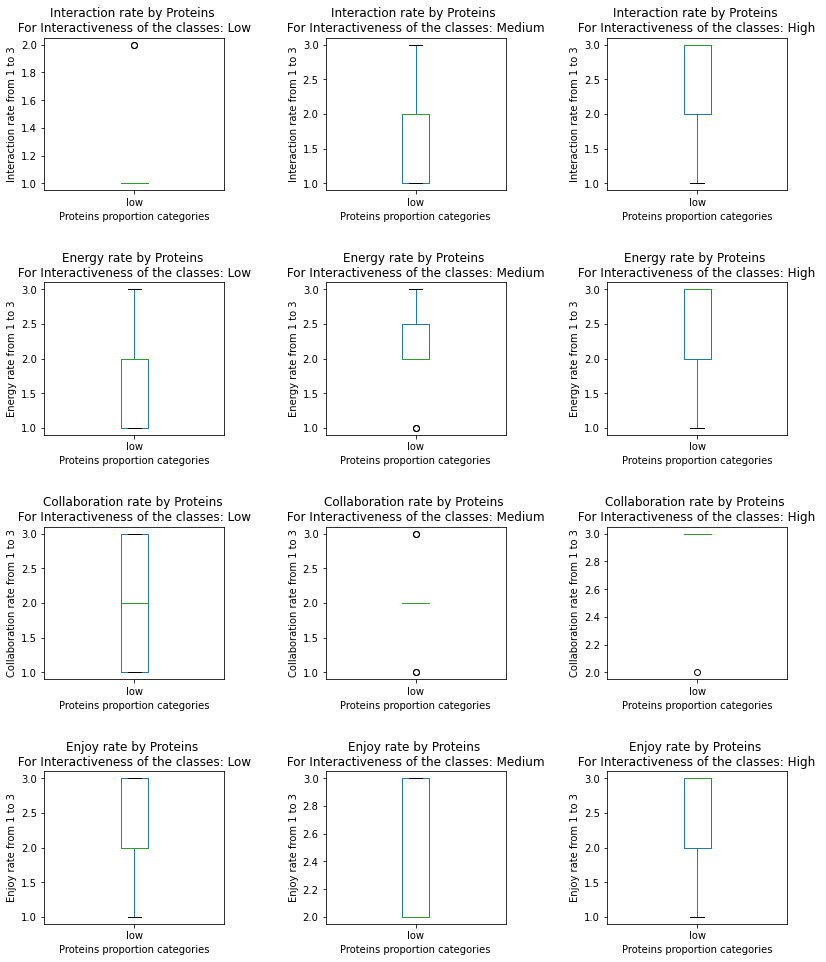

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,14))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'Proteins_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Proteins \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Carbohydrates-Protein

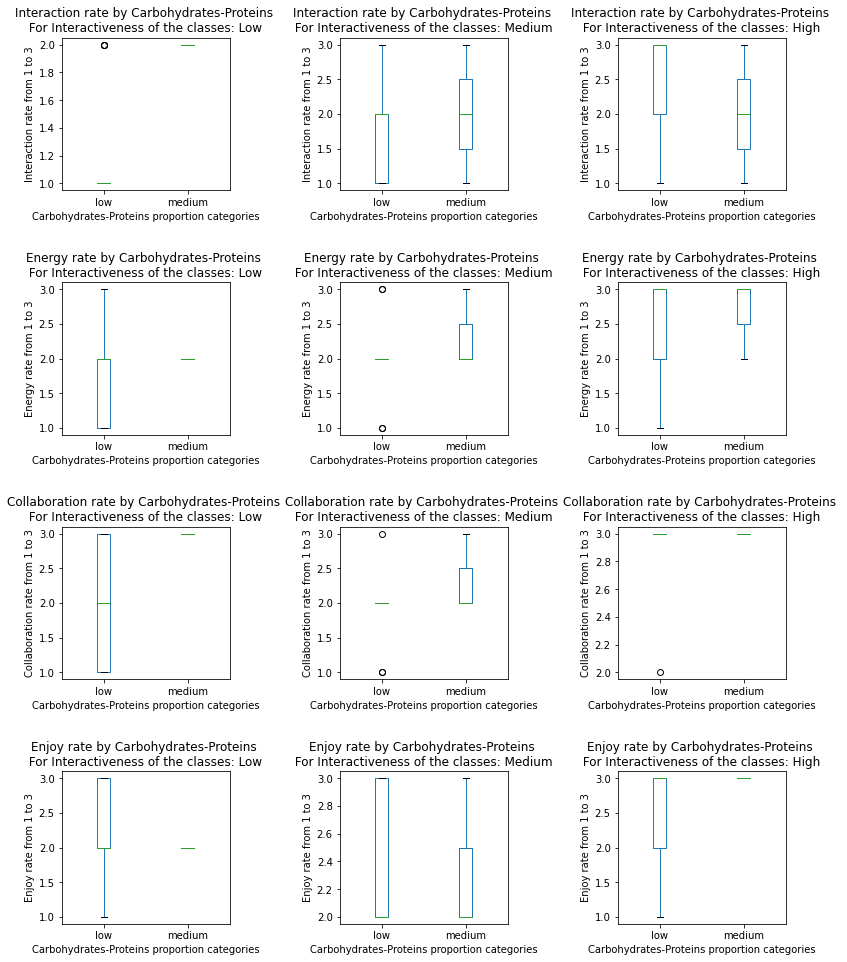

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,14))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'Carbohydrates-Proteins_categories', values = col, index = 'Timestamp')[['low', 'medium']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates-Proteins \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Carbohydrates-Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Fats

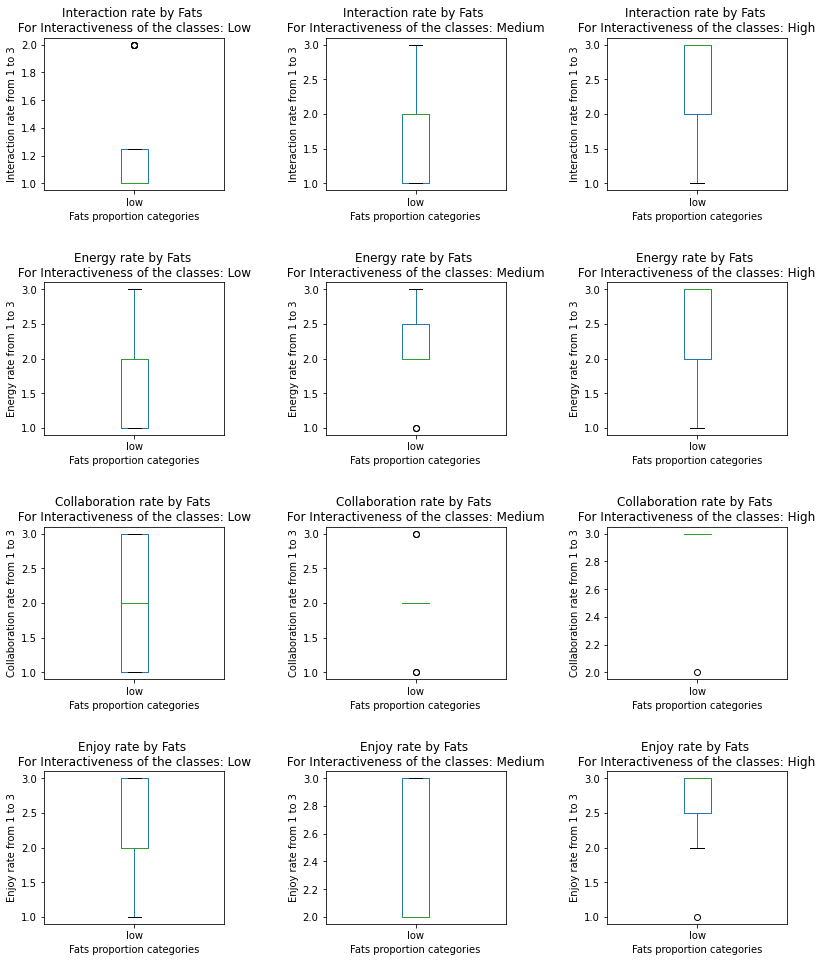

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,14))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'Fats_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Fats \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fats proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Energy drinks

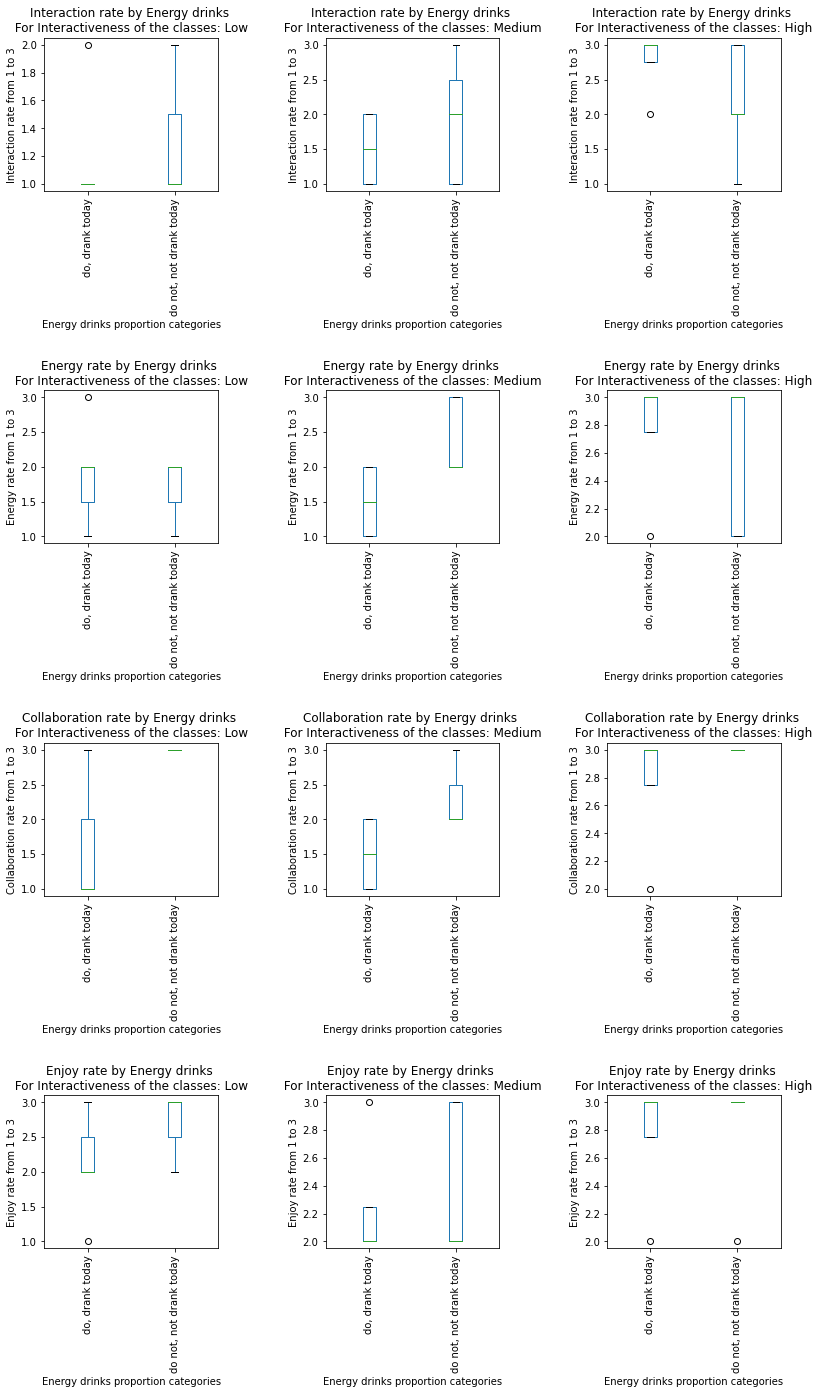

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,20))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'energy_drinks', values = col, index = 'Timestamp')[['do, drank today',
                                                                                                                'do not, not drank today']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Energy drinks \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Energy drinks proportion categories")
        axes[i,j].xaxis.set_tick_params(rotation=90)
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Interactiveness of the classes - Fullness

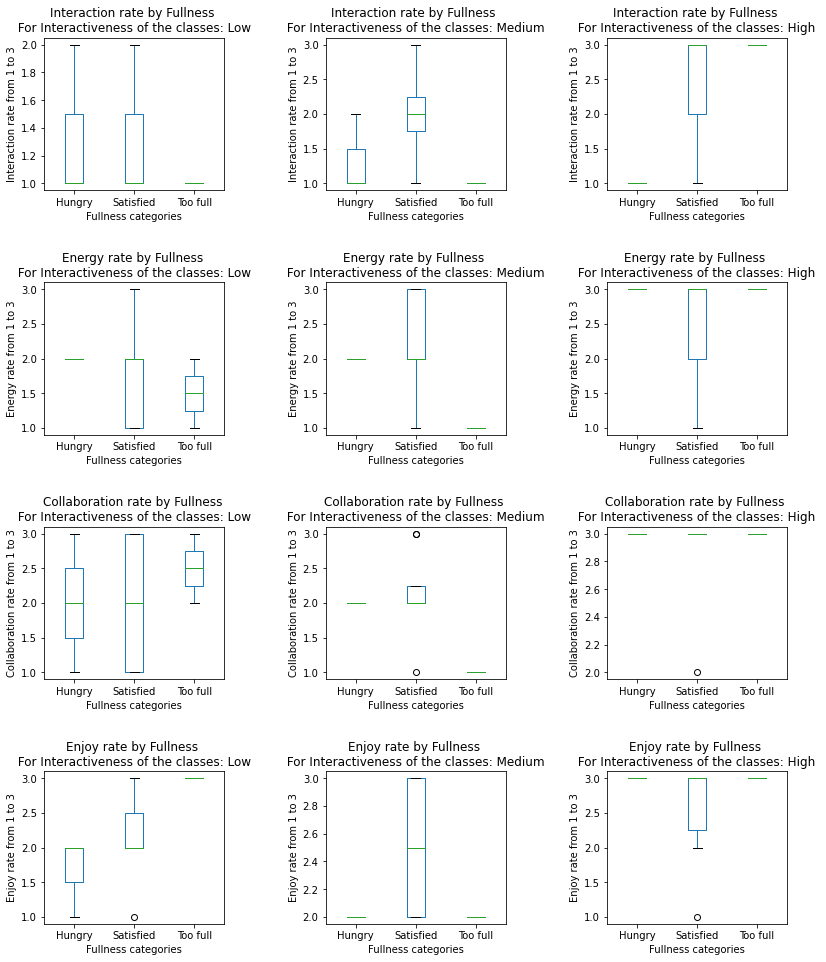

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(12,14))

j = 0
for col2 in ['low', 'medium', 'high']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['interaction_rate']==col2].pivot_table(columns = 'fullness', values = col, index = 'Timestamp')[['Hungry', 'Satisfied', 'Too full']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Fullness \n For Interactiveness of the classes: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fullness categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Carbohydrates

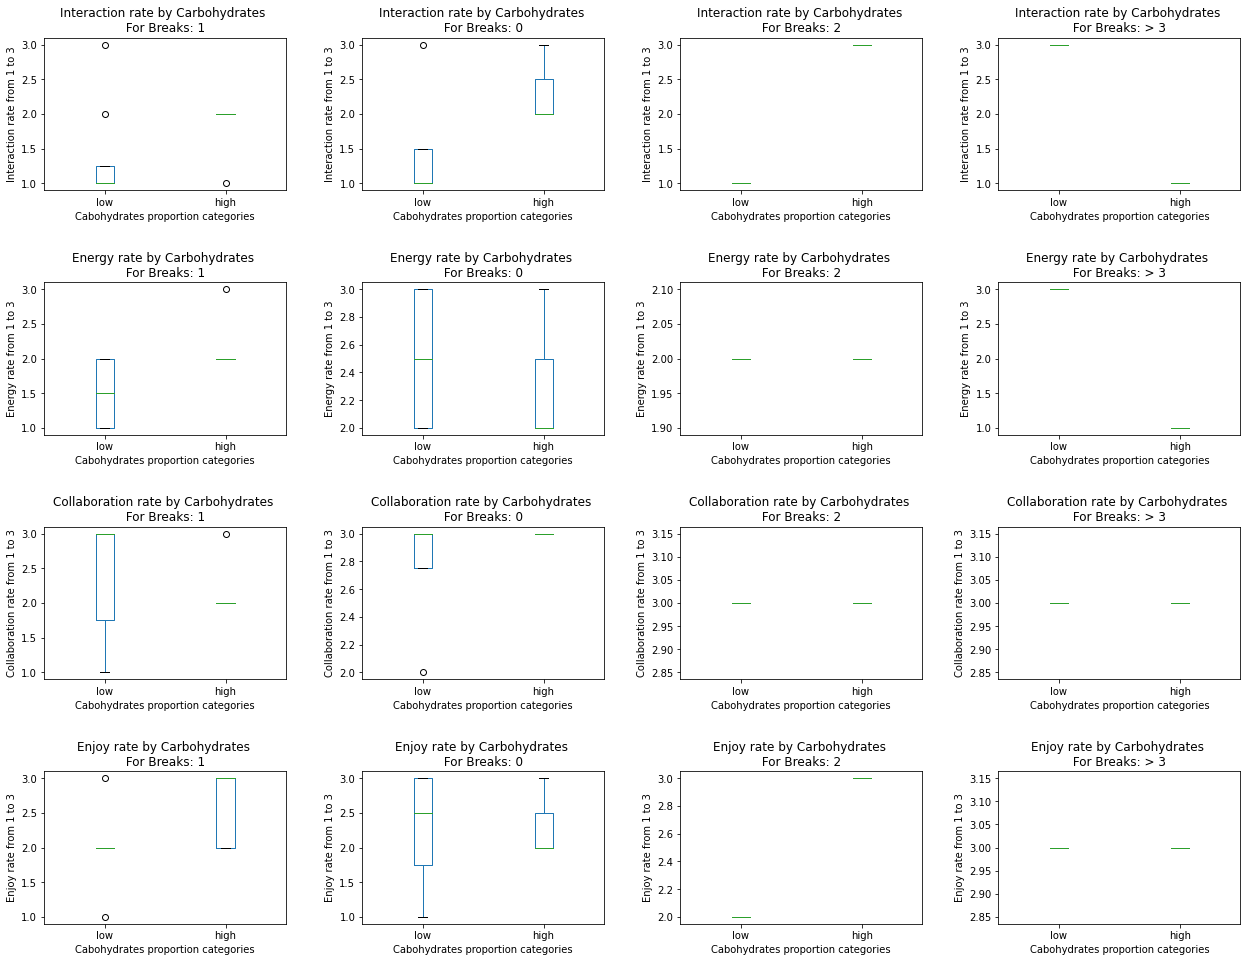

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,14))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'Carbohydrates_categories', values = col, index = 'Timestamp')[['low', 'high']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Cabohydrates proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Proteins

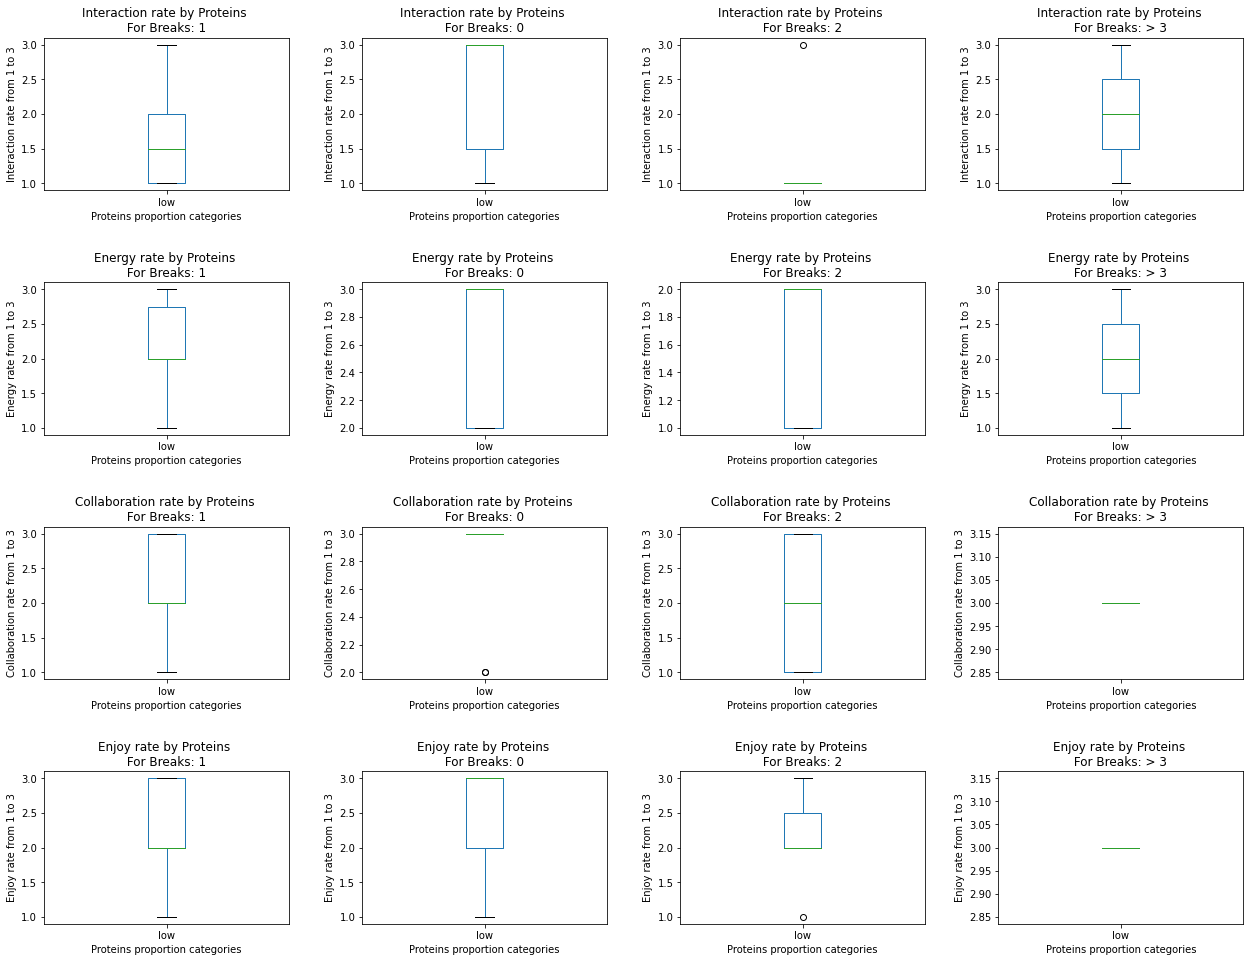

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,14))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'Proteins_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Proteins \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Carbohydrates-Protein

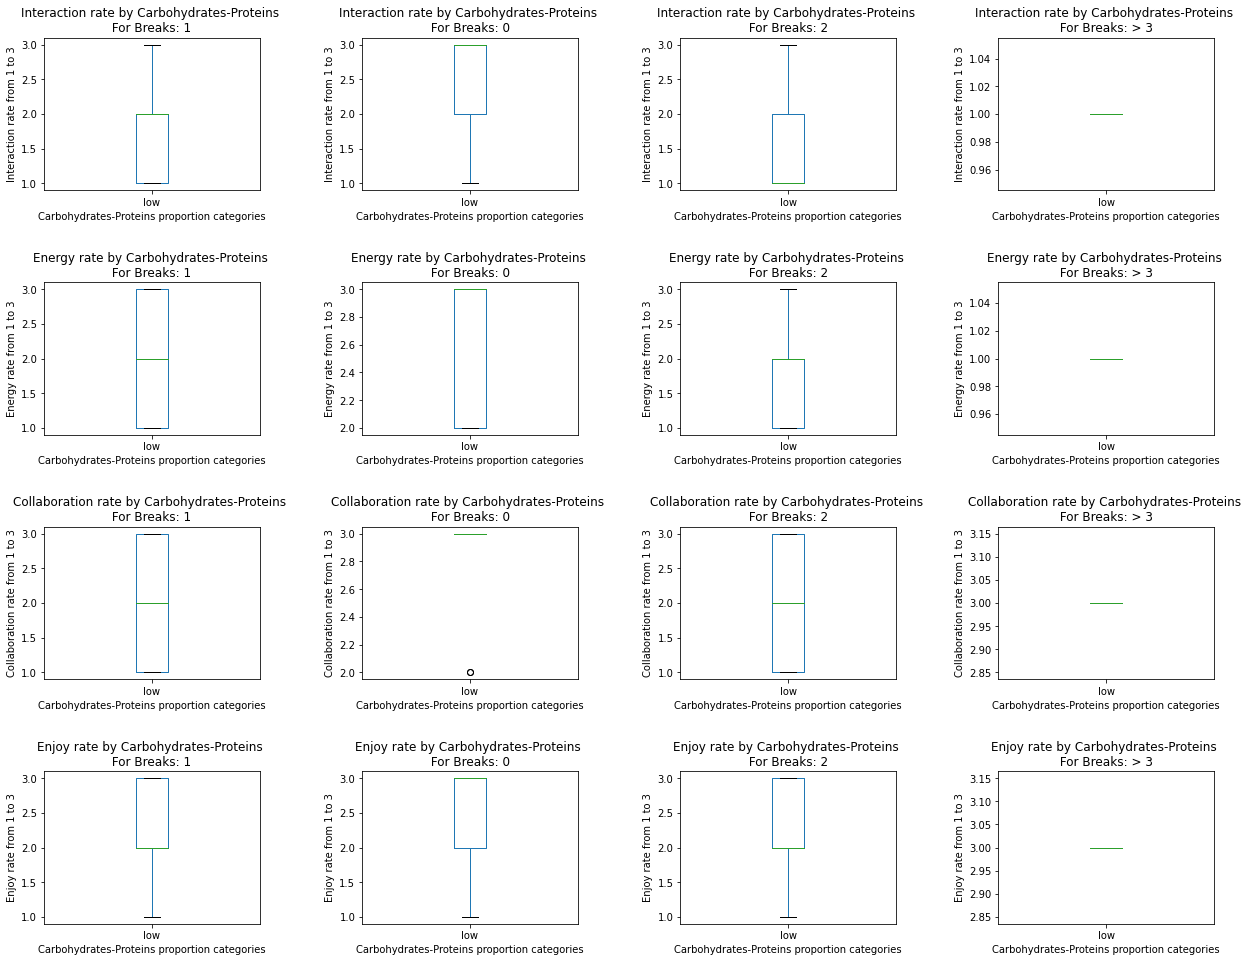

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,14))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'Carbohydrates-Proteins_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Carbohydrates-Proteins \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Carbohydrates-Proteins proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Fats

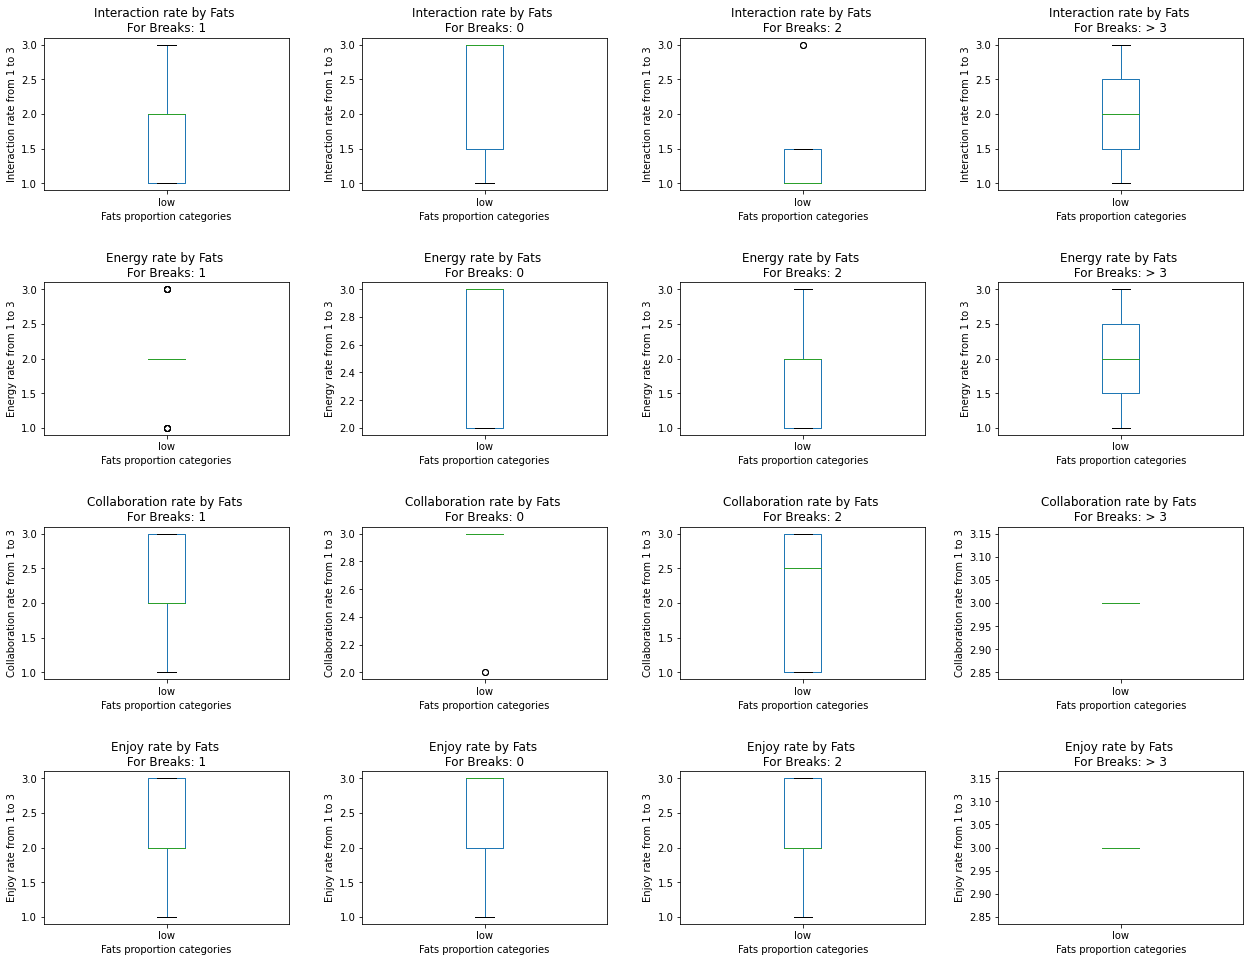

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,14))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'Fats_categories', values = col, index = 'Timestamp')[['low']].plot.box(ax=axes[i,j])
        
        axes[i,j].set_title(f"{col.capitalize()} rate by Fats \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fats proportion categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Energy drinks

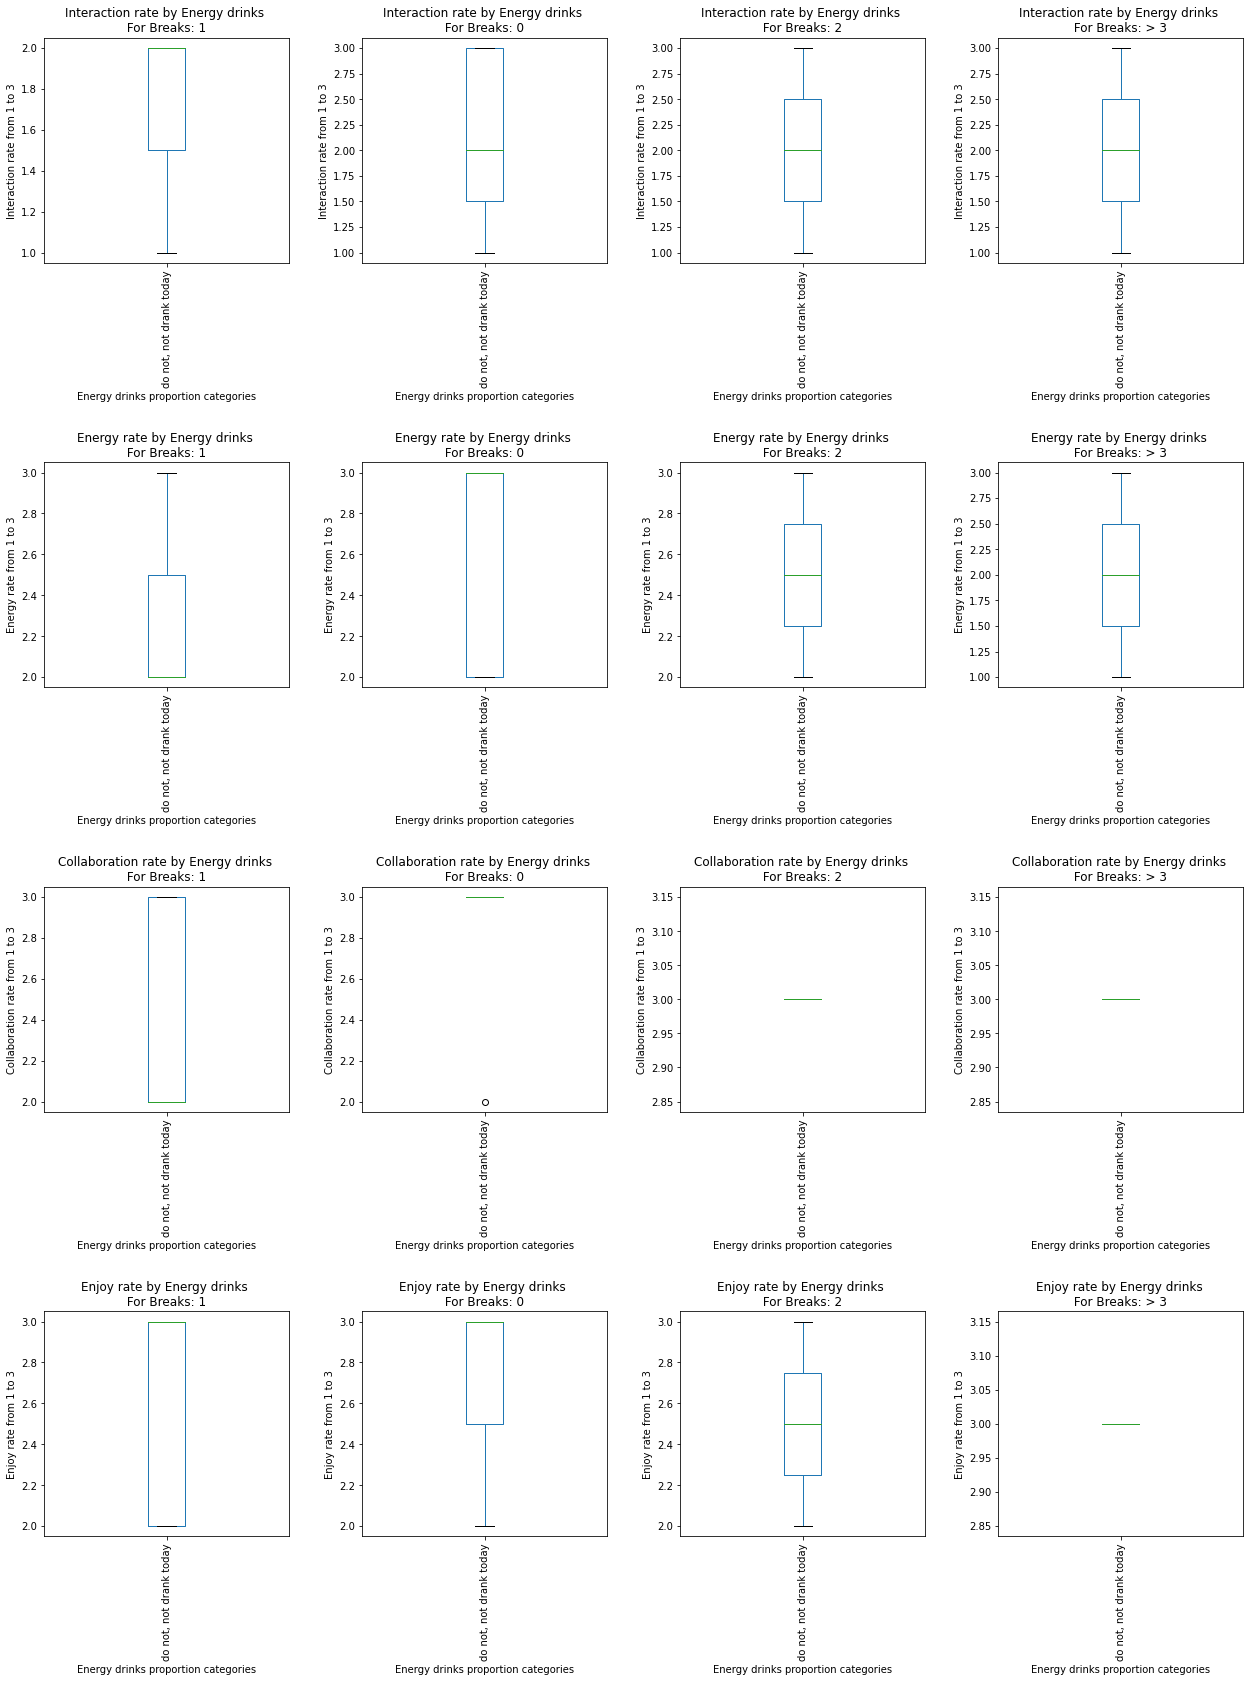

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,24))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'energy_drinks', values = col, index = 'Timestamp')[['do not, not drank today']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Energy drinks \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Energy drinks proportion categories")
        axes[i,j].xaxis.set_tick_params(rotation=90)
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

### Breaks - Fullness

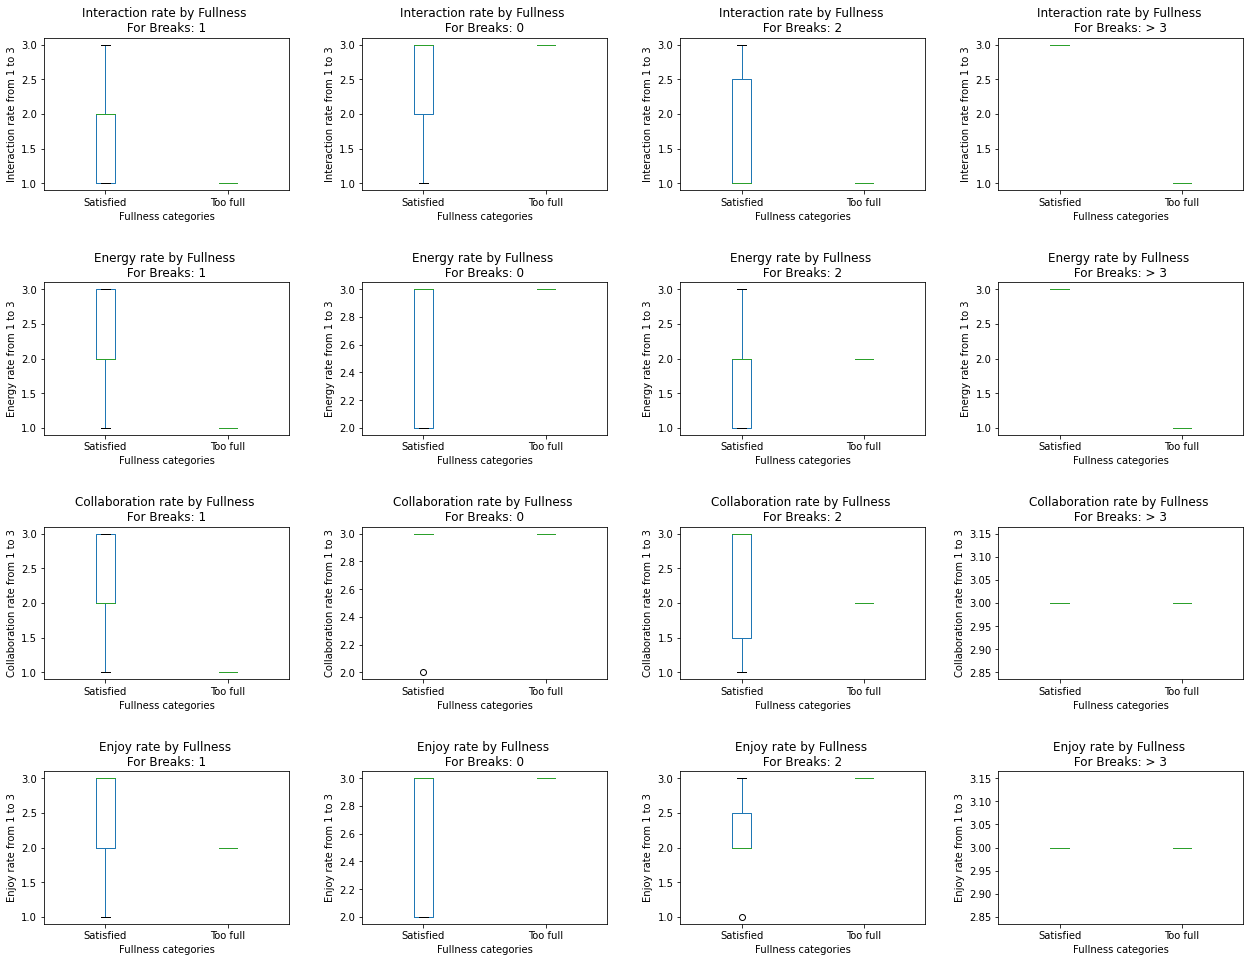

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, figsize=(18,14))

j = 0
for col2 in ['1', '0', '2', '> 3']:

    i = 0
    for col in ['interaction', 'energy', 'collaboration', 'enjoy']:
        df[df['class_breaks']==col2].pivot_table(columns = 'fullness', values = col, index = 'Timestamp')[['Satisfied', 'Too full']].plot.box(ax=axes[i,j])

        axes[i,j].set_title(f"{col.capitalize()} rate by Fullness \n For Breaks: {col2.capitalize()} ")
        axes[i,j].set_xlabel(f"Fullness categories")
        axes[i,j].set_ylabel(f"{col.capitalize()} rate from 1 to 3")
        i = i+1

    j = j+1

fig.tight_layout(pad=3.0)

# Additional: Correlation Matrix

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_tmp = df[df["Form confidency"]>=7].reset_index(drop=True)
df_tmp

,Timestamp,Age,Sex,Degree,Diet,Carbohydrates,Carbohydrates-Proteins,Proteins,Proteins-Fats,Fats,Others,Feeling,Energy drinks,Class type,Class long,Class rate,Class breaks,Class energy,Class interaction,Class phone,Class collaboration,Class enjoy,Form completion,Form confidency,Carbohydrates_categories,interaction,energy,collaboration,enjoy,Proteins_categories,Carbohydrates-Proteins_categories,Fats_categories,energy_drinks,fullness,class_type,length_class,interaction_rate,class_breaks
0,2021/11/23 7:30:55 PM GMT+1,22,Female,M1 Digital science,Vegetarian;Non restricted,>75%,50%,<10%,0%,0%,0%,0.0,"I usually do not, and I did not drink today ei...",Programming lessons,3h,3,1,3,1,15.0,3,3,At the end of the day,9,high,1,2,2,2,low,medium,low,"do not, not drank today",Hungry,active,Equal or more than 3h,medium,1
1,2021/11/23 7:48:25 PM GMT+1,18,Female,L1 FDV,Non restricted,50%,0%,25%,0%,25%,0%,2.0,"I usually do not, and I did not drink today ei...",Student Presentations (I'm the one listening);...,2h,4,0,5,5,7.0,4,4,At the end of the day,10,medium,3,3,3,3,low,low,low,"do not, not drank today",Too full,passive,Less than 3h,high,0
2,2021/11/23 8:06:20 PM GMT+1,28,Male,M1 Digital science,Non restricted,<10%,<10%,<10%,<10%,<10%,<10%,0.0,"I usually do, and I drank today too",Individual self study,1h,2,0,3,2,5.0,3,2,At the end of the day,7,low,1,2,2,1,low,low,low,"do, drank today",Hungry,passive,Less than 3h,low,0
3,2021/11/23 8:30:41 PM GMT+1,26,Male,M1 Digital science,Non restricted,50%,0%,25%,0%,25%,0%,0.0,"I usually do not, and I did not drink today ei...",Lectures,3h,3,1,3,2,0.0,3,3,A different day than the one you're referring to,8,medium,1,2,2,2,low,low,low,"do not, not drank today",Hungry,passive,Equal or more than 3h,medium,1
4,2021/11/23 8:36:05 PM GMT+1,26,Male,M2 Life science,"No pork, no seafood",25%,25%,25%,25%,0%,0%,1.0,"I usually do not, and I did not drink today ei...",Lectures;Individual self study,2h30,2,0,3,1,0.0,4,3,At the end of the day,9,low,1,2,3,2,low,low,low,"do not, not drank today",Satisfied,passive,Less than 3h,low,0
5,2021/11/23 8:37:10 PM GMT+1,27,Female,M1 Learning science,Non restricted,50%,25%,25%,25%,25%,25%,2.0,"I usually do, and I drank today too",Student Presentations (I'm the one presenting)...,3h,2,2,3,2,0.0,3,4,At the end of the day,7,medium,1,2,2,3,low,low,low,"do, drank today",Too full,active,Equal or more than 3h,low,2
6,2021/11/24 3:22:32 AM GMT+1,19,Male,L1 FDV,Glucid restricted,50%,0%,25%,25%,0%,0%,1.0,"I usually do not, and I did not drink today ei...",Lectures;Individual self study,2h,3,0,4,4,10.0,3,4,At the end of the day,8,medium,3,3,2,3,low,low,low,"do not, not drank today",Satisfied,passive,Less than 3h,medium,0
7,2021/11/24 2:39:56 PM GMT+1,29,Female,M1 Digital science,Non restricted,50%,25%,75%,<10%,50%,<10%,1.0,"I usually do not, but I drank today",Individual self study,3h,3,2,3,3,5.0,3,3,A different day than the one you're referring to,7,medium,2,2,2,2,high,low,medium,"do not, drank today",Satisfied,passive,Equal or more than 3h,medium,2
8,2021/11/24 7:50:06 PM GMT+1,23,Others,M1 Life science,Vegetarian,>75%,0%,0%,<10%,<10%,0%,1.0,"I usually do, and I drank today too",Lectures;Group or project work;Student Present...,3h,4,2,3,4,15.0,4,4,At the end of the day,9,high,3,2,3,3,low,low,low,"do, drank today",Satisfied,active,Equal or more than 3h,high,2
9,2021/11/25 7:14:40 PM GMT+1,31,Female,M1 Digital science;M1 Life science,Non restricted,25%,25%,25%,<10%,0%,25%,1.0,"I usually do, and I drank today too",Individual self study,3h,1,1,2,2,20.0,4,3,At the end of the day,7,low,1,1,3,2,low,low,low,"do, drank today",Satisfied,passive,Equal or more than 3h,low,1


In [ ]:
df_tmp = df_tmp[["Carbohydrates_categories","Proteins_categories","Carbohydrates-Proteins_categories","Fats_categories","energy_drinks","fullness","class_type","length_class","interaction_rate","class_breaks","interaction","energy","collaboration","enjoy"]]
df_tmp.head()

,Carbohydrates_categories,Proteins_categories,Carbohydrates-Proteins_categories,Fats_categories,energy_drinks,fullness,class_type,length_class,interaction_rate,class_breaks,interaction,energy,collaboration,enjoy
0,high,low,medium,low,"do not, not drank today",Hungry,active,Equal or more than 3h,medium,1,1,2,2,2
1,medium,low,low,low,"do not, not drank today",Too full,passive,Less than 3h,high,0,3,3,3,3
2,low,low,low,low,"do, drank today",Hungry,passive,Less than 3h,low,0,1,2,2,1
3,medium,low,low,low,"do not, not drank today",Hungry,passive,Equal or more than 3h,medium,1,1,2,2,2
4,low,low,low,low,"do not, not drank today",Satisfied,passive,Less than 3h,low,0,1,2,3,2


In [ ]:
for col in ["Carbohydrates_categories", "Proteins_categories", "Carbohydrates-Proteins_categories", "Fats_categories"]:
  df_tmp.loc[df_tmp[col] == 'low', [col]] = 1
  df_tmp.loc[df_tmp[col] == 'medium', [col]] = 2
  df_tmp.loc[df_tmp[col] == 'high', [col]] = 3
  df_tmp[col] = df_tmp[col].astype(str).astype(int)

In [ ]:
df_tmp.loc[df_tmp['energy_drinks'] == 'do not, not drank today', ['energy_drinks']] = 1
df_tmp.loc[df_tmp['energy_drinks'] == 'do not, drank today', ['energy_drinks']] = 2
df_tmp.loc[df_tmp['energy_drinks'] == 'do, not drank today', ['energy_drinks']] = 3
df_tmp.loc[df_tmp['energy_drinks'] == 'do, drank today', ['energy_drinks']] = 4
df_tmp["energy_drinks"] = pd.to_numeric(df_tmp["energy_drinks"], errors = "coerce")

In [ ]:
df_tmp.loc[df_tmp['fullness'] == 'Hungry', ['fullness']] = 1
df_tmp.loc[df_tmp['fullness'] == 'Satisfied', ['fullness']] = 2
df_tmp.loc[df_tmp['fullness'] == 'Too full', ['fullness']] = 3
df_tmp["fullness"] = pd.to_numeric(df_tmp["fullness"], errors = "coerce")

In [ ]:
df_tmp.loc[df_tmp['class_type'] == 'passive', ['class_type']] = 1
df_tmp.loc[df_tmp['class_type'] == 'active', ['class_type']] = 2
df_tmp["class_type"] = pd.to_numeric(df_tmp["class_type"], errors = "coerce")

In [ ]:
df_tmp.loc[df_tmp['length_class'] == 'Less than 3h', ['length_class']] = 1
df_tmp.loc[df_tmp['length_class'] == 'Equal or more than 3h', ['length_class']] = 2
df_tmp["length_class"] = pd.to_numeric(df_tmp["length_class"], errors = "coerce")

In [ ]:
df_tmp.loc[df_tmp['interaction_rate'] == 'low', ['interaction_rate']] = 1
df_tmp.loc[df_tmp['interaction_rate'] == 'medium', ['interaction_rate']] = 2
df_tmp.loc[df_tmp['interaction_rate'] == 'high', ['interaction_rate']] = 3
df_tmp["interaction_rate"] = pd.to_numeric(df_tmp["interaction_rate"], errors = "coerce")

In [ ]:
df_tmp.loc[df_tmp['class_breaks'] == '0', ['class_breaks']] = 1
df_tmp.loc[df_tmp['class_breaks'] == '1', ['class_breaks']] = 2
df_tmp.loc[df_tmp['class_breaks'] == '2', ['class_breaks']] = 3
df_tmp.loc[df_tmp['class_breaks'] == '> 3', ['class_breaks']] = 4
df_tmp["class_breaks"] = pd.to_numeric(df_tmp["class_breaks"], errors = "coerce")

In [ ]:
df_tmp.head()

,Carbohydrates_categories,Proteins_categories,Carbohydrates-Proteins_categories,Fats_categories,energy_drinks,fullness,class_type,length_class,interaction_rate,class_breaks,interaction,energy,collaboration,enjoy
0,3,1,2,1,1,1,2,2,2,2,1,2,2,2
1,2,1,1,1,1,3,1,1,3,1,3,3,3,3
2,1,1,1,1,4,1,1,1,1,1,1,2,2,1
3,2,1,1,1,1,1,1,2,2,2,1,2,2,2
4,1,1,1,1,1,2,1,1,1,1,1,2,3,2


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Carbohydrates_categories           37 non-null     int64
 1   Proteins_categories                37 non-null     int64
 2   Carbohydrates-Proteins_categories  37 non-null     int64
 3   Fats_categories                    37 non-null     int64
 4   energy_drinks                      37 non-null     int64
 5   fullness                           37 non-null     int64
 6   class_type                         37 non-null     int64
 7   length_class                       37 non-null     int64
 8   interaction_rate                   37 non-null     int64
 9   class_breaks                       37 non-null     int64
 10  interaction                        37 non-null     int64
 11  energy                             37 non-null     int64
 12  collaboration           

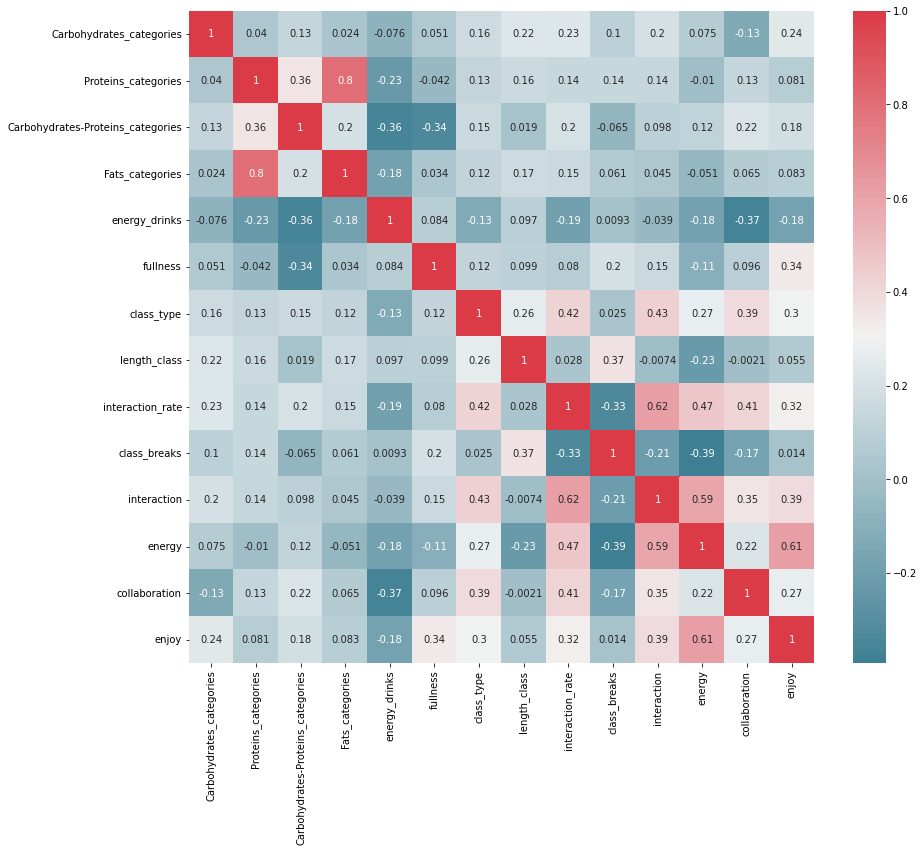

In [ ]:
corr = df_tmp.corr()
plt.subplots(figsize=(14,12))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

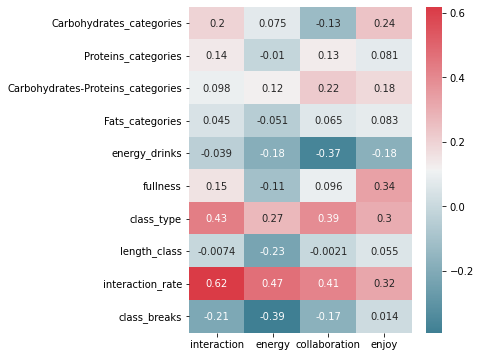

In [ ]:
corr = df_tmp.corr()
plt.subplots(figsize=(5,6))
sns.heatmap(corr.iloc[0:10, 10:], annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))